<font size="6">Линейный классификатор </font>

# Линейные модели. Задача регресии

## Линейная регрессия

Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных. Она стала простым предшественником нелинейных методов, которые используются для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует заданным точкам. Напомним, что общее уравнение для прямой есть $f(x) = m⋅x + b$, где $m$ — наклон линии, а $b$ — её сдвиг по $y$. Таким образом, решение линейной регрессии определяет значения для $m$ и $b$ так, что $f (x)$ приближается как можно ближе к $y$.

Отобразим на графике случайные точки, расположенные в окрестности $y = 3⋅x + 2$

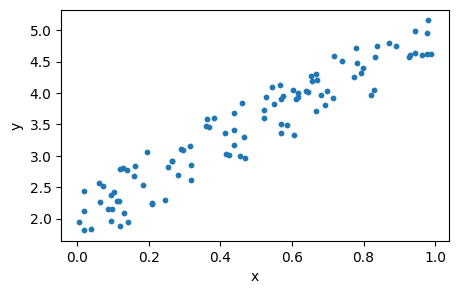

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + (np.random.rand(100, 1) - 0.5)

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Предположим, что нам неизвестны параметры наклона и сдвига $m$ и $b$. Для их определения мы бы могли рассмотреть всевозможные прямые вида $f(x) = m⋅x + b$ и выбрать среди семейства прямых такую, которая лучше всего приближает имеющиеся данные:

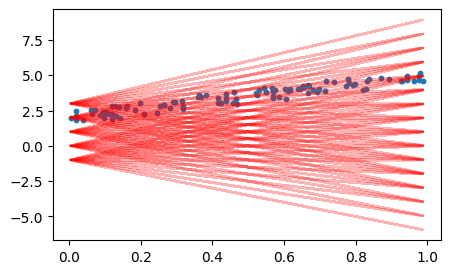

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for m in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + m * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.show()

Модель $f(x) = m⋅x + b$ задаёт параметрическое семейство функций, а выбор "правильного" представителя из параметрического семейства и называется *обучением* модели:

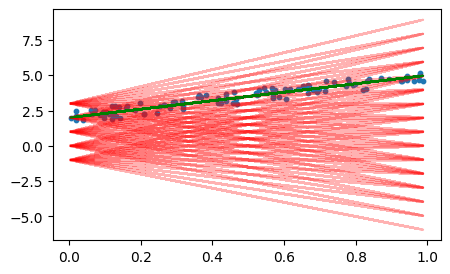

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for m in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + m * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.plot(x, 2 + 3 * x, color="g")
plt.show()

 Функция потерь

Функция потерь — это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением. Одна очень распространенная функция потерь называется средней квадратичной ошибкой (MSE). Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем квадраты их длин и усредняем.

То есть мы определяем ошибку модели на одном объекте как квадрат расстояния между предсказанием и истинным значением, а общая функция потерь будет задана выражением:

$$\large L_i = (y_i - f(x_i))^2$$
$$\large L = \sum L_i = \frac{1}{N} \sum (y_i - f(x_i))^2$$

Для прямой с параметрами $m=4, b = 2$:

In [ ]:
loss = np.sum((y - (4 * x + 2)) ** 2) / (len(x))
print(f"loss value = {loss:.05f}")

loss value = 0.36800


###  Своя реализация линейной регрессии

Реализуем простейшую модель линейной регрессии с использованием библиотеки NumPy на датасете, определённом выше.

Используем метод наименьших квадратов: [МНК простейшие частные случаи](https://ru.wikipedia.org/wiki/Метод_наименьших_квадратов#Простейшие_частные_случаи)

Estimated coefficients:
b_0 = [2.05808002] 
b_1 = [2.93655106]
Root mean squared error:  0.0762332458287501
R2 score:  0.9038655568672764


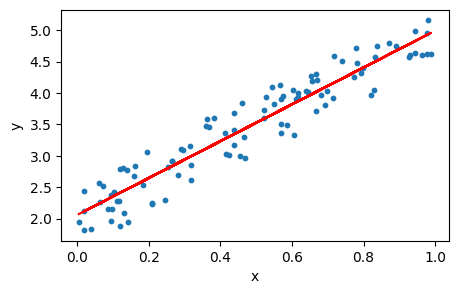

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


def list_mult(x, y):
    return [xi * yi for xi, yi in zip(x, y)]


def estimate_coef(x, y):
    n = len(x)
    assert n == len(y)
    b_0 = (n * sum(list_mult(x, y)) - sum(x) * sum(y)) / (
        n * sum(list_mult(x, x)) - sum(x) ** 2
    )
    b_1 = (sum(y) - b_0 * sum(x)) / n
    return (b_1, b_0)


coefs = estimate_coef(x, y)

y_predicted = coefs[0] + coefs[1] * x

print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(coefs[0], coefs[1]))
print("Root mean squared error: ", mean_squared_error(y, y_predicted))
print("R2 score: ", r2_score(y, y_predicted))

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.plot(x, y_predicted, color="r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Модель линейной регрессии из библиотеки scikit-learn

Рассмотрим следующую задачу. Пусть мы хотим построить модель предсказания успеваемости студента на основе информации о величине потраченного им на изучение материала количества времени в часах. Это пример простейшей задачи линейной регрессии.

**Регрессией** (регрессионным анализом) называется набор статистических методов, использующихся для определения характера связи между одной зависимой переменной (традиционно обозначаемой $Y$ и называемой также "откликом", "результатом" или "лейблом") и одной или рядом других независимых переменных (традиционно обозначаемых $X$ и называемых также "предикторами", "ковариатами" или "признаками").

Загрузим датасет. Мы должны увидеть, что он содержит два числовых признака — часы и результаты.

In [ ]:
import pandas as pd

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/student_scores.csv"
)
print(dataset.shape)
dataset.head()

(25, 2)


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Построим график зависимости одного от другого, а также отобразим распределения каждой из переменных

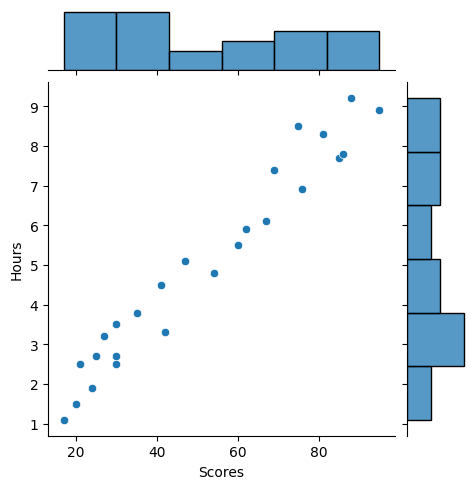

In [ ]:
import seaborn as sns


sns.jointplot(data=dataset, x="Scores", y="Hours", height=5)
plt.show()

Разделим наши данные на train и test

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, 1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Теперь создадим модель для линейной регрессии. Чтобы не писать с нуля, воспользуемся готовой моделью из библиотеки `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

И обучим ее

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

Посмотрим, что получилось

In [ ]:
x_train.shape

(20, 1)

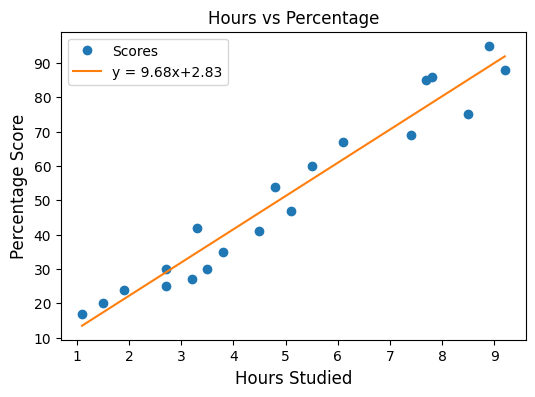

In [ ]:
x_points = np.linspace(min(x_train), max(x_train), 100)  # 100 dots at min to max
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_train, y_train, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Теперь сделаем предсказание для тестовой выборки

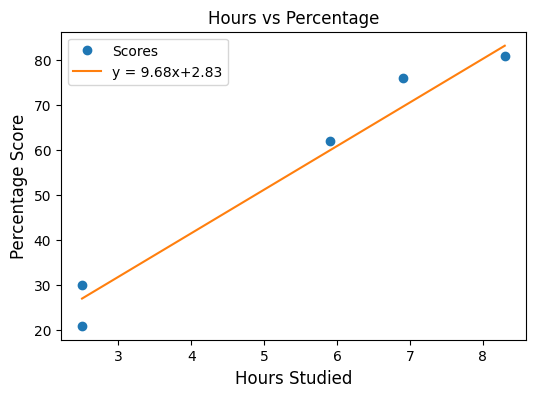

In [ ]:
y_pred = regressor.predict(x_test)

x_points = np.linspace(min(x_test), max(x_test), 100)
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_test, y_test, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Выглядит неплохо

Посчитаем метрики для наших значений:

In [ ]:
from sklearn import metrics

y_pred = regressor.predict(x_test)

print("Mean Absolute Error: %9.2f" % metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: %10.2f" % metrics.mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error: %5.2f"
    % np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)

Mean Absolute Error:      3.92
Mean Squared Error:      18.94
Root Mean Squared Error:  4.35


## Случай многих переменных и практические особенности работы с линейными моделями

#### Нормализация данных

Загрузим датасет с образцами здоровой и раковой ткани. Датасет состоит из 569 примеров, где каждой строчке из 30 признаков соответствует класс `1` злокачественной (*malignant*) или `0` доброкачественной (*benign*) ткани. Задача состоит в том, чтобы по 30 признакам обучить модель определять тип ткани (злокачественная или доброкачественная).


In [ ]:
import sklearn.datasets

cancer = sklearn.datasets.load_breast_cancer()  # load data
x = cancer.data  # features
y = cancer.target  # labels(classes)
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"x[0]: \n {x[0]}")
print(f"y[0]: \n {y[0]}")

x shape: (569, 30), y shape: (569,)
x[0]: 
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
y[0]: 
 0


Теперь давайте посмотрим на сами данные. У нас есть 569 строк, в каждой из которой по 30 колонок. Такие колонки называют признаками или *features*. Попробуем математически описать все эти признаки (mean, std, min и тд).

In [ ]:
pd.DataFrame(x).describe()

0           1           2            3           4   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               5           6           7           8           9   ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   
25%      0.064920    0.029560    0.020310    0.161900    0.057700  ...   
50%      0.092630    0.061540    0.033500    0.179200    0.061540  ...   
75%      0.130400    0.130700    0.074000    0.195700    0.066120  ...   
max      0.345400    0.426800    0.201200    0.304000    0.097440  ...   

               20          21          22           23          24  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               25          26          27          28          29  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 30 columns]

То же самое, но в виде графика. Видно, что у фич совершенно разные значения.

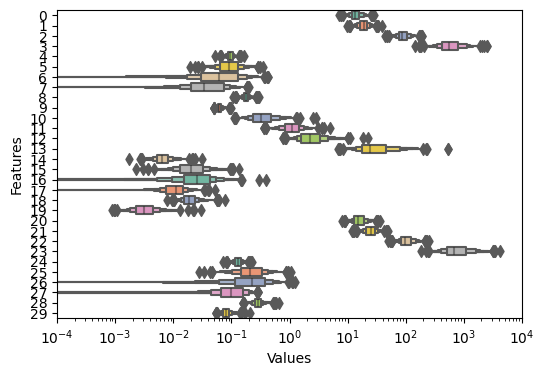

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.boxenplot(data=pd.DataFrame(x), orient="h", palette="Set2")
ax.set(xscale="log", xlim=(1e-4, 1e4), xlabel="Values", ylabel="Features")
plt.show()

Чтобы адекватно сравнить данные между собой, нам следует использовать нормализацию.

 **Нормализация, выбор Scaler**

Нормализацией называется процедура приведения входных данных к единому масштабу (диапазону) значений. Фактически это означает построение взаимно однозначного соответствия между некоторыми размерными величинами (которые измеряются в метрах, килограммах, годах и т. п.) и их безразмерными аналогами, принимающими значение в строго определенном числовом диапазоне (скажем, на отрезке $[0,1]$). Преобразование данных к единому числовому диапазону (иногда говорят *домену*) позволяет считать их равноправными признаками и единообразно передавать их на вход модели. В некоторых источниках данная процедура явно называется *масштабирование*.

$$\text{scaling map} \; : \text{some arbitrary feature domain} \rightarrow \text{definite domain} $$

Иногда под нормализацией данных понимают процедуру *стандартизации*, то есть приведение множеств значений всех признаков к стандартному нормальному распределению — распределению с нулевым средним значением и единичной дисперсией.

$$\text{standartization map} : f_i \rightarrow (f_i - \text{mean} (\{f_i\})) \cdot \frac{1}{\text{std} (\{f_i\})}$$

Рассмотрим небольшой пример. Пусть у нас есть данные о некоторой группе людей, содержащие два признака: *возраст* (в годах) и *размер дохода* (в рублях). Возраст может изменяться в диапазоне от 18 до 70 ( интервал $70 - 18 = 52$). А доход от 30 000 р до 500 000 р (интервал $500 000 - 30 000 = 470 000$). В таком варианте разница в возрасте имеет меньшее влияние, чем разница в доходе. Получается, что доход становится более важным признаком, изменения в котором влияют больше при сравнении схожести двух людей.

Должно быть так, чтобы максимальные изменения любого признака в «основной массе объектов» были одинаковы. Тогда потенциально все признаки будут равноценны.

Осталось определиться с выбором инструмента. Часто используют следующие варианты: `MinMaxScaler`, `StandardScaler`, `RobustScaler`

Сравним `MinMaxScaler`, `StandardScaler`, `RobustScaler` для признака `data[:,0]`. **Обратите внимание на ось X**

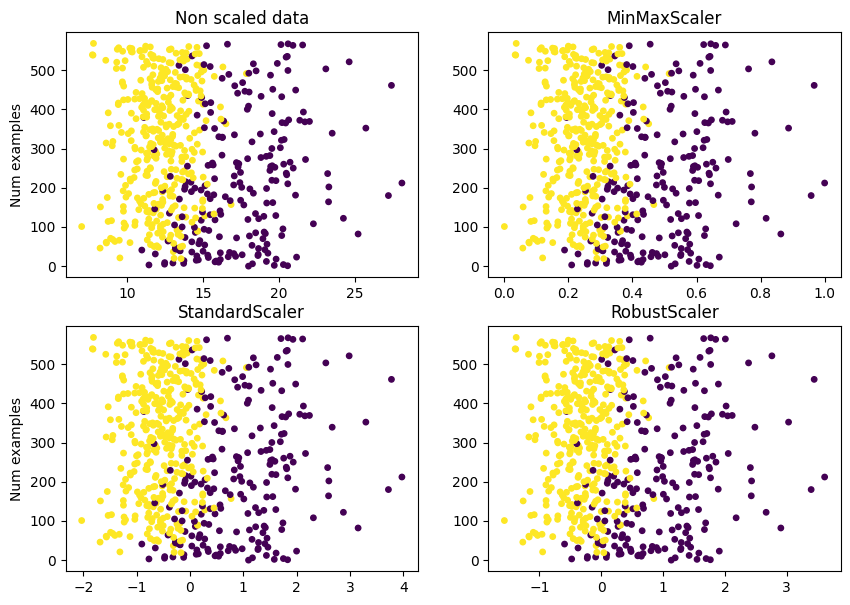

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


test = x[:, 0].reshape(-1, 1)

plt.figure(1, figsize=(10, 7))
plt.subplot(221)  # set location
plt.scatter(test, range(len(test)), c=y, s=15)
plt.ylabel("Num examples", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Non scaled data", fontsize=12)

# scale data with MinMaxScaler
test_scaled = MinMaxScaler().fit_transform(test)
plt.subplot(222)
plt.scatter(test_scaled, range(len(test)), c=y, s=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("MinMaxScaler", fontsize=12)

# scale data  with StandardScaler
test_scaled = StandardScaler().fit_transform(test)
plt.subplot(223)
plt.scatter(test_scaled, range(len(test)), c=y, s=15)
plt.ylabel("Num examples", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("StandardScaler", fontsize=12)

# scale data  with RobustScaler
test_scaled = RobustScaler().fit_transform(test)
plt.subplot(224)
plt.scatter(test_scaled, range(len(test)), c=y, s=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("RobustScaler", fontsize=12)
plt.show()

Идея **`MinMaxScaler`** заключается в том, что он преобразует данные из имеющегося диапазона значений в диапазон от 0 до 1. Может быть полезно, если нужно выполнить преобразование, в котором отрицательные значения не допускаются (например, масштабирование RGB пикселей).

$$z_i=\frac{X_i-X_{min}}{X_{max}-X_{min}}$$

$z_i$ — масштабированное значение,
$X_i$ — текущее значение,
$X_{min}$ и $X_{max}$ — минимальное и максимальное значения имеющихся данных.

Идея **`StandardScaler`** заключается в том, что он преобразует данные таким образом, что распределение будет иметь среднее значение 0 и стандартное отклонение 1. Большинство значений будет в  диапазоне от -1 до 1. Это стандартная трансформация, и она применима во многих ситуациях.

$$z_i=\frac{X_i-u}{s}$$

$u$ — среднее значение (или 0 при `with_mean=False`) и $s$ — стандартное отклонение (или 0 при `with_std=False`)

И `StandardScaler`, и `MinMaxScaler` очень чувствительны к наличию выбросов. **`RobustScaler`** использует медиану и основан на *процентилях*. k-й процентиль — это величина, равная или не превосходящая k процентов чисел во всем имеющемся распределении. Например, 50-й процентиль (медиана) распределения таков, что 50% чисел из распределения не меньше данного числа. Соответственно, `RobustScaler` не зависит от небольшого числа очень больших предельных выбросов (outliers). Следовательно, результирующий диапазон преобразованных значений признаков больше, чем для предыдущих скэйлеров и, что более важно, примерно одинаков.

$$z_i=\frac{X_i-X_{median}}{IQR}$$

$X_{median}$ — значение медианы, $IQR$ — межквартильный диапазон, равный разнице между 75-ым и 25-ым процентилями

Для нашей задачи по определению раковых опухолей обработаем наши 30 признаков с помощью `StandardScaler`.

In [ ]:
x_norm = StandardScaler().fit_transform(x)  # scaled data

Видим, что они стали намного более сравнимы между собой.

In [ ]:
pd.DataFrame(x_norm).describe()

0             1             2             3             4   \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean  -3.153111e-15 -6.568462e-15 -6.993039e-16 -8.553985e-16  6.081447e-15   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00 -1.984504e+00 -1.454443e+00 -3.112085e+00   
25%   -6.893853e-01 -7.259631e-01 -6.919555e-01 -6.671955e-01 -7.109628e-01   
50%   -2.150816e-01 -1.046362e-01 -2.359800e-01 -2.951869e-01 -3.489108e-02   
75%    4.693926e-01  5.841756e-01  4.996769e-01  3.635073e-01  6.361990e-01   
max    3.971288e+00  4.651889e+00  3.976130e+00  5.250529e+00  4.770911e+00   

                 5             6             7             8             9   \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean  -1.136369e-15 -2.997017e-16  1.023981e-15 -1.860648e-15 -1.504752e-15   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -1.610136e+00 -1.114873e+00 -1.261820e+00 -2.744117e+00 -1.819865e+00   
25%   -7.470860e-01 -7.437479e-01 -7.379438e-01 -7.032397e-01 -7.226392e-01   
50%   -2.219405e-01 -3.422399e-01 -3.977212e-01 -7.162650e-02 -1.782793e-01   
75%    4.938569e-01  5.260619e-01  6.469351e-01  5.307792e-01  4.709834e-01   
max    4.568425e+00  4.243589e+00  3.927930e+00  4.484751e+00  4.910919e+00   

       ...            20            21            22            23  \
count  ...  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean   ... -2.297713e-15  1.742016e-15 -1.198807e-15  6.118909e-16   
std    ...  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min    ... -1.726901e+00 -2.223994e+00 -1.693361e+00 -1.222423e+00   
25%    ... -6.749213e-01 -7.486293e-01 -6.895783e-01 -6.421359e-01   
50%    ... -2.690395e-01 -4.351564e-02 -2.859802e-01 -3.411812e-01   
75%    ...  5.220158e-01  6.583411e-01  5.402790e-01  3.575891e-01   
max    ...  4.094189e+00  3.885905e+00  4.287337e+00  5.930172e+00   

                 24            25            26            27            28  \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean  -5.094929e-15 -2.122887e-15  6.118909e-16 -1.998011e-16 -2.422589e-15   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -2.682695e+00 -1.443878e+00 -1.305831e+00 -1.745063e+00 -2.160960e+00   
25%   -6.912304e-01 -6.810833e-01 -7.565142e-01 -7.563999e-01 -6.418637e-01   
50%   -4.684277e-02 -2.695009e-01 -2.182321e-01 -2.234689e-01 -1.274095e-01   
75%    5.975448e-01  5.396688e-01  5.311411e-01  7.125100e-01  4.501382e-01   
max    3.955374e+00  5.112877e+00  4.700669e+00  2.685877e+00  6.046041e+00   

                 29  
count  5.690000e+02  
mean   2.497514e-15  
std    1.000880e+00  
min   -1.601839e+00  
25%   -6.919118e-01  
50%   -2.164441e-01  
75%    4.507624e-01  
max    6.846856e+00  

[8 rows x 30 columns]

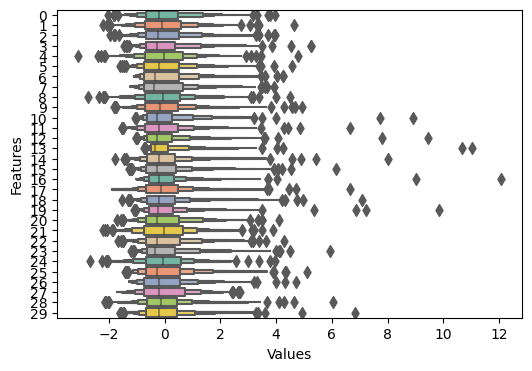

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.boxenplot(data=pd.DataFrame(x_norm), orient="h", palette="Set2")
ax.set(xlabel="Values", ylabel="Features")
plt.show()

#### Проблема переобучения в случае линейных моделей

Часто может оказаться, что признаковое описание объекта избыточно и между различными признаками имеются связи. Для устойчивости работы линейных моделей важно, чтобы среди признаков не было скоррелированных пар.

Например, если мы будем решать задачу регрессии на наборе признаков $x_1 \dots x_n$ среди которых есть связь $x_2 = 5 x_1$ и возьмём линейную модель вида
$$\large y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b,$$
то с учётом данной связи мы можем записать:
$$\large y = w_1 x_1 + w_2 (5x_1) + \dots + w_n x_n + b = (w_1 + 5 w_2) x_1 +  w_3 x_3 + \dots + w_n x_n + b.$$

Таким образом, наша модель теперь учитывает признак $x_1$ с одним "общим" весом $(w_1 + 5 w_2)$, не смотря на то что он закодирован двумя независимыми параметрами. Решение, то есть набор весовых коэффициентов $w_i$ перестало быть единственным, так как мы теперь можем делать произвольные преобразования с числами $w_1$ и $w_2$ до тех пор пока $(w_1 + 5 w_2)$ остаётся неизменным:

$$\large (w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5\cdot10^9 ,\, w_2 \rightarrow  w_2 - 10^9 \} = (w_1 + 5 w_2 + 5 \cdot 10^9 - 5 \cdot 10^9) = (w_1 + 5 w_2).$$

Визуализировать подобные зависимости можно при помощи построения матрицы попарных корреляций признаков:

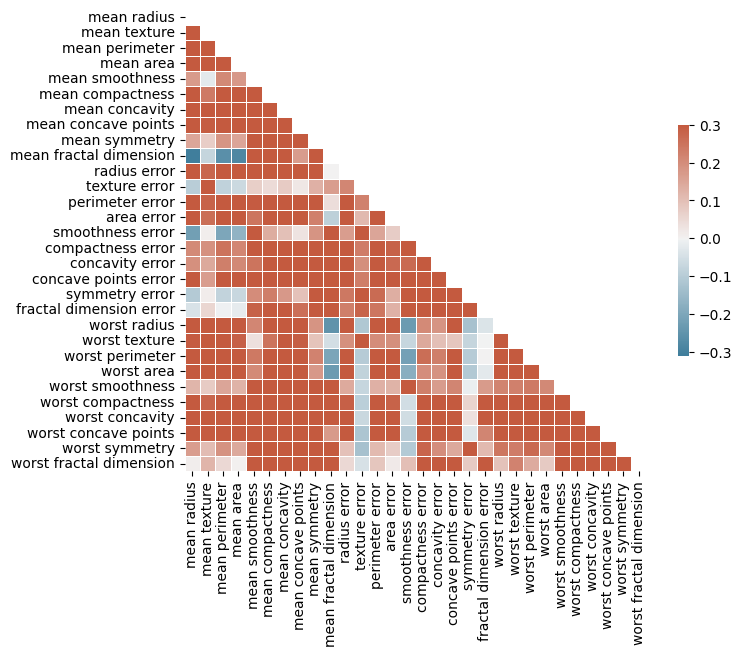

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Compute the correlation matrix
corr = cancer_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.show()

### 1D классификация

Рассмотрим одномерный пример. У нас есть данные по массе мышей. Часть из них определена как мыши с нормальной массой тела, а часть — как мыши с ожирением. Чтобы их отделить друг от друга, нам достаточно одного критерия. Мы можем посмотреть на график и визуально определить предельную массу, после которой мышки будут жирненькими.

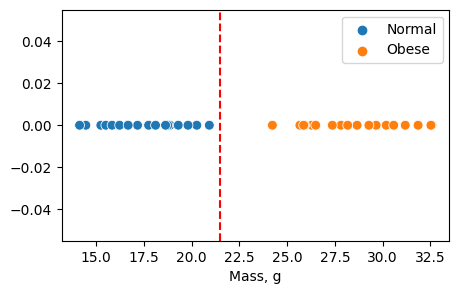

In [ ]:
def generate_data(total_len=40):
    x = np.hstack(
        [
            np.random.uniform(14, 21, total_len // 2),
            np.random.uniform(24, 33, total_len // 2),
        ]
    )
    y = np.hstack([np.zeros(total_len // 2), np.ones(total_len // 2)])
    return x, y


def plot_data(x, y, total_len=40, s=50, threshold=None, margin=None):
    ax = sns.scatterplot(x=x, y=np.zeros(len(x)), hue=y, s=s)
    if threshold:
        ax.axvline(threshold, color="red", ls="dashed")
    if margin:
        for line in margin:
            ax.axvline(line, color="pink", ls="dashed")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Normal", "Obese"])
    ax.set(xlabel="Mass, g")
    return ax


total_len = 40
x, y = generate_data(total_len=total_len)
plt.figure(figsize=(5, 3))
ax = plot_data(x, y, threshold=21.5, total_len=total_len)

Теперь, пользуясь нашим простым критерием, попробуем классифицировать каких-то новых мышей.

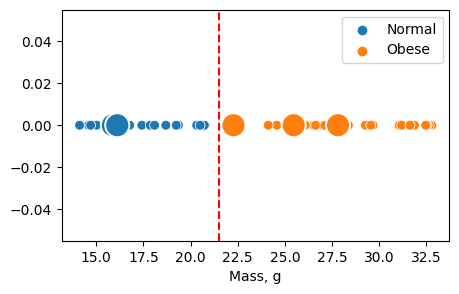

In [ ]:
x_test = np.random.uniform(14, 30, 5)


def classify(x, threshold=21.5):
    y = np.zeros_like(x)
    y[x > threshold] = 1
    return y


total_len = 40
threshold = 21.5
x, y = generate_data(total_len=total_len)
plt.figure(figsize=(5, 3))
ax = plot_data(x, y, threshold=threshold, total_len=total_len)
ax = plot_data(x_test, classify(x_test, threshold), total_len=total_len, s=300)

Но что если наши мыши находятся тут?


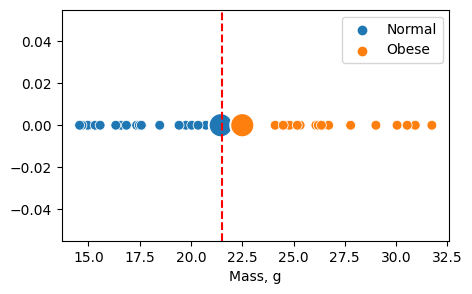

In [ ]:
x_test = np.array([21.45, 22.5])

total_len = 40
x, y = generate_data(total_len=total_len)
plt.figure(figsize=(5, 3))
ax = plot_data(x, y, total_len=total_len)
ax = plot_data(x_test, classify(x_test), threshold=21.5, total_len=total_len, s=300)

С точки зрения нашего классификатора, все просто: больше порогового значения — толстые мыши, меньше — нормальные. Но, с точки зрения здравого смысла, логичнее было бы классифицировать обоих мышей как нормальных, так как они значительно ближе к нормальным, чем к ожиревшим.

Вооружившись этим новым знанием, попробуем классифицировать наших отъевшихся мышек по-умному. Возьмем крайние точки в каждом кластере. И в качестве порогового значения будем использовать среднее между ними.

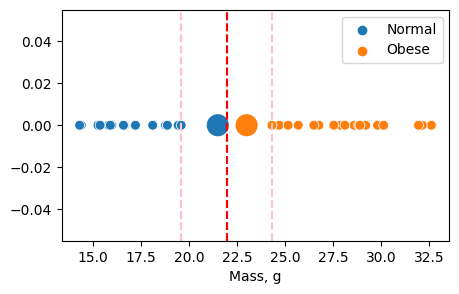

In [ ]:
x, y = generate_data(total_len=total_len)
normal_limit = x[y == 0].max()  # extreme point for 'normal'
obese_limit = x[y == 1].min()  # extreme point for 'obese'

threshold = np.mean([normal_limit, obese_limit])  # separated with mean value

x_test = np.array([21.5, 23])
plt.figure(figsize=(5, 3))
ax = plot_data(
    x, y, total_len=total_len, threshold=threshold, margin=[normal_limit, obese_limit]
)
ax = plot_data(
    x_test,
    classify(x_test, threshold=threshold),
    total_len=total_len,
    s=300,
    threshold=threshold,
)

Мы можем посчитать, насколько наша мышь близка к тому, чтобы оказаться в другом классе. Такое расстояние называется **margin**. И оно считается как $\mathrm{margin} = |\mathrm{threshold} - \mathrm{observation}|$

In [ ]:
margins = np.abs(x_test - threshold)
print(margins)

[0.45841656 1.04158344]


Соответственно, если мы посчитаем margins для наших крайних точек `normal_limit` и `obese_limit`, мы найдем самое большое возможное значение margin для нашего классификатора

In [ ]:
margin_0 = np.abs(normal_limit - threshold)
margin_1 = np.abs(obese_limit - threshold)
print(margin_0, margin_1)

2.3598453649025473 2.3598453649025473


Такой классификатор мы называем **Maximum Margin Classifier**. Он хорошо работает в случае, когда все данные размечены аккуратно. Теперь рассмотрим более реалистичный пример, где что-то пошло не так.

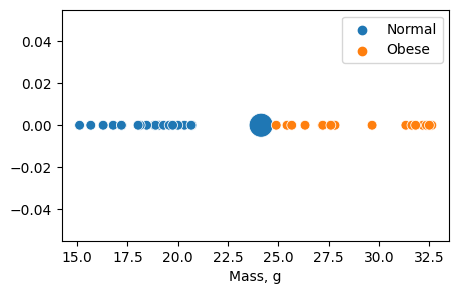

In [ ]:
def generate_realistic_data(total_len=40):
    x = np.hstack(
        [
            np.random.uniform(14, 21, total_len // 2),
            np.random.uniform(24, 33, total_len // 2),
        ]
    )
    y = np.hstack([np.zeros(total_len // 2), np.ones(total_len // 2)])
    indx = np.where(x == x[y == 1].min())[0]
    y[indx] = 0
    s = np.ones_like(x) * 50
    s[indx] = 300
    return x, y, s


total_len = 40
x, y, s = generate_realistic_data(total_len=total_len)
plt.figure(figsize=(5, 3))
ax = plot_data(x, y, total_len=total_len, s=s)

В таком случае наш **Maximum Margin Classifier** работать не будет. Исходя из этого, мы можем прийти к выводу, что наш классификатор очень чувствителен к выбросам. Решение этой проблемы будет рассмотрено в следующем разделе.

### 2D классификация

Теперь рассмотрим пример, где мы измерили не только вес мышей, но и их длину от хвоста до носа. Мы можем применить метод Support Vector Classifier, и теперь классы разделяет не одно пороговое значение (по сути, точка), а линия.

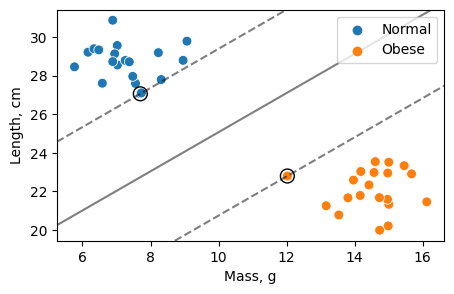

In [ ]:
from sklearn import svm
from sklearn.datasets import make_blobs


def generate_2d_data(total_len=40):
    x, y = make_blobs(n_samples=total_len, centers=2, random_state=42)
    x[:, 0] += 10
    x[:, 1] += 20
    return x, y


def plot_data(x, y, total_len=40, s=50, threshold=21.5):
    ax = sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Normal", "Obese"])
    ax.set(xlabel="Mass, g", ylabel="Length, cm")
    return ax


total_len = 40
x, y = generate_2d_data(total_len=total_len)
plt.figure(figsize=(5, 3))
ax = plot_data(x, y, total_len=total_len)

# Code for illustration, later we will understand how it works
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(x, y)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### 3D классификация

Если мы добавим еще одно измерение — возраст, мы обнаружим, что наши данные стали трехмерными, а разделяет их теперь не линия, а плоскость.

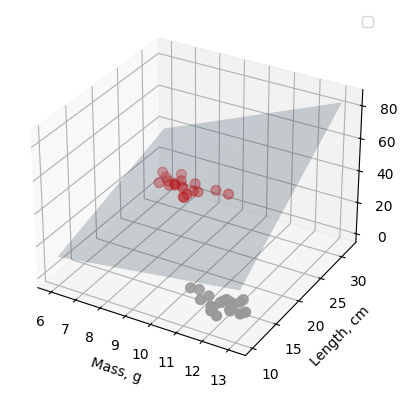

In [ ]:
def generate_3d_data(total_len=40):
    x, y = make_blobs(n_samples=total_len, centers=2, random_state=42, n_features=3)
    x[:, 0] += 10
    x[:, 1] += 20
    x[:, 2] += 10
    return x, y


def plot_data(x, y, total_len=40, s=50, threshold=21.5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(xs=x[:, 0], ys=x[:, 1], zs=x[:, 2], c=y, s=s, cmap="Set1")
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    ax.plot_surface(XX, YY, XX * YY * 0.2, alpha=0.2)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Normal", "Obese"])
    ax.set(xlabel="Mass, g", ylabel="Length, cm", zlabel="Age, days")
    return ax


total_len = 40
x, y = generate_3d_data(total_len=total_len)
ax = plot_data(x, y, total_len=total_len)

Соответственно, если бы у нас было 4 измерения и больше (например: вес, длина, возраст, кровяное давление), то многомерная плоскость, которая бы разделяла наши классы, называлась бы **гиперплоскость** (рисовать мы ее, конечно же, не будем). Чисто технически, и точка, и линия — тоже гиперплоскости. Но все же гиперплоскостью принято называть то, что нельзя нарисовать на бумаге.

### Геометрическая интерпретация

Теперь, когда мы разобрались с тем, что такое регрессия, вернемся к задаче классификации изображений из датасета CIFAR-10. Как можно применить регрессию для классификации?

Предположим, у нас есть только 2 класса. Как можно использовать регрессию для того, чтобы определить относится ли изображение к классу 0 или к классу 1? В упрощенном варианте задача будет состоять в том, чтобы провести разделяющую плоскость (прямую) между 2-мя классами. Например, мы можем провести прямую через 0.

Такая прямая будет задана направляющим вектором $\vec W$, число компонентов которого будет равно размерности пространства признаков. Уравнение гиперплоскоскости в этом случае имеет вид

$$\large \sum_i W_i \cdot x_i = 0$$
или, что эквивалентно:
$$\large ( \vec W , \vec x) = 0$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/regression_for_classification_imgs.png" width="270">





Рассмотрим другую ситуацию. В этом случае мы не можем просто провести прямую через 0, но можем отступить от 0 на какое-то расстояние и провести ее там. Вспомним, что уравнение прямой это $y=wx+b$, где $b$ — это смещение (*bias*). Соответственно, если b != 0, то прямая через 0 проходить не будет, а будет проходить через значение b.

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/regression_for_classification_add_bias.png" width="270">

Таким образом, для классификации объектов на два класса нам нужно подобрать значение вектора $W$ и величину смещения $B$. Вместе они зададут гиперплоскость вида:
$$\large ( \vec W , \vec x) - B = 0$$

[Linear Classification Loss Visualization
](http://vision.stanford.edu/teaching/cs231n-demos/linear-classify/)


Если у нас есть несколько классов, мы можем для каждого из них посчитать уравнение $y_{i} = w_{i}x_{i}+b_{i}$.

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/regression_for_classification_add_bias_add_multiclasses.jpg" width="400">







На картинке нас интересуют 3 класса. Соответственно, мы можем записать систему линейных уравнений:

\begin{cases}
y_{0} = w_{0}x_{0} + b_{0} \\
y_{1} = w_{1}x_{1} + b_{1} \\
y_{2} = w_{2}x_{2} + b_{2} \\
\end{cases}

### Единообразный подход к учету смещения

Мы их можем собрать в матрицу, тогда получится следующее:

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/scalar_product_add_bias.png" width="750">

У нас есть матрица коэффициентов, которые мы каким-то образом подобрали, пока ещё непонятно как. Есть вектор $x$, соответствующий изображению.

Мы умножаем вектор на матрицу, получаем нашу гиперплоскость для четырехмерного пространства в данном случае. Чтобы оно не лежало в 0, мы должны добавить смещение. И мы можем сделать это после, но можно взять и этот вектор смещения (вектор **b**) просто приписать к матрице **W**.

Что будет выходом такой конструкции? Мы умножили матрицу весов на наш вектор, соответствующий изображению, получили некоторый отклик. По этому отклику мы так же, как и при реализации метода ближайшего соседа можем судить: если он больше остальных, то мы предполагаем, что это кошка.


In [ ]:
img = np.array([56, 231, 24, 2])
w_cat = np.array([0.2, -0.5, 0.1, 2.0])
print("Image ", img)
print("Weights ", w_cat)
print("img * w_cat ", img * w_cat)
print("sum ", (img * w_cat).sum())
print("Add bias ", (img * w_cat).sum() + 1.1)

Image  [ 56 231  24   2]
Weights  [ 0.2 -0.5  0.1  2. ]
img * w_cat  [  11.2 -115.5    2.4    4. ]
sum  -97.89999999999999
Add bias  -96.8


<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/img_to_function_get_scores.png" width="600">

Обозначим входное изображение как $x$, а шаблон для первого из классов как $w_0$.

Элементы пронумеруем подряд 1,2,3 … $n$. То есть развернем матрицу пикселей изображения в вектор.

Тогда результат сравнения изображения с этим шаблоном будет вычисляться по формуле: $x[0]*w_0[0] + x[1]*w_0[1] + … x[n-1]*w_0[n-1]$

**Предварительная обработка**

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/img_to_vector_to_compute_scalar_product.png" width="700">

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/scalar_product_ways_to_use.png" width="800">

Эта простая модель лежит в основе практически всех сложных моделей, которые мы будем рассматривать дальше. Внутри будем также пользоваться скалярным произведением.

В дальнейшем мы будем проходить сверточные сети, они работают очень похоже:
мы тоже накладываем шаблон на некоторую матрицу и перемножаем элементы, затем складываем. Единственное отличие — обычно ядро свертки меньше, чем размер самого изображения.



Собирая все вместе, получаем какое-то компактное представление, что у нас есть некоторая функция, на вход которой мы подаем изображение, и у нее есть параметры (веса). Пока происходит просто умножение вектора на матрицу, в дальнейшем это может быть что-то более сложное, функция будет представлять какую-то более сложную модель. А на выходе (для классификатора) мы получаем числа, которые интерпретируют уверенность модели в том, что изображение принадлежит к определенному классу.


<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/input_img_scalar_product_add_bias_get_scores.png" width="450">

Соответственно, эти коэффициенты, которые являются весами модели, надо каким-то образом подбирать. Но прежде чем подбирать коэффициенты, давайте определимся со следующим: как мы будем понимать, что модель работает хорошо или плохо? Вывод модели представляет собой просто некоторый набор чисел. Но как эти числа следует правильно интерпретировать? Рассмотрим этот вопрос в следующем разделе.

## Линейный классификатор с пороговой функций принятия решения. Hard Margin Classifier

Рассмотрим пример задачи классификации на два класса. У нас имеется:
1. Набор данных из $N$ наблюдений.
2. Для каждого из наблюдений нам известно признаковое описание объекта в виде набора вещественных чисел. То есть объекту под номером $i$ соответствует вектор $\vec x_i$.
3. Также для каждого наблюдения нам известна истинная метка класса. Мы знаем что объекту с признаковым описанием $\vec x_i$ соответствует метка класса $y_i$. Будем считать, что метки классов принимают значения $y_i \in \pm 1$.

Мы хотим подобрать такие $\vec W$ и $B$, чтобы можно было провести такие гиперплоскости:

$$\large (\vec W \vec x) - B  = 1$$
**"Лежащие на этой плоскости и выше объекты относятся к классу $+1$"**

$$\large (\vec W \vec x) - B  = -1$$
**"Лежащие на этой плоскости и ниже объекты относятся к классу $-1$"**

Расстояние между двумя этими **жесткими** границами задаётся просто длиной вектора $\vec W$ и равно $\frac{2}{||\vec W||}$

Условие того, что объекты лежат $(\vec x_i, y_i)$ лежат по правильную сторону от разделяющих поверхностей можно записать в совместно:

$$\large y_i ((\vec W, \vec x_i) - B )\ge 1,$$ которое должно выполняться для всех объектов $1 \le i \le N$.

Среди всех решений $\vec W$ и $B$, которые удовлетворяют условию выше, мы хотим подобрать такое, при котором пороговые разделяющие поверхности будут находится дальше всего. Так как расстояние между ними равно $\frac{2}{||\vec W||}$, мы приходим к следующей задаче на условный экстремум:

$$\large ||\vec W|| \rightarrow \min, \; y_i ((\vec W, \vec x_i) - B )\ge 1$$

Подобная задача на условный экстремум может быть решена при помощи [метода множителей Лагранжа](https://en.wikipedia.org/wiki/Lagrange_multiplier):

Найти $\alpha_i$, $\vec W$ и $B$, которые реализуют минимум функции потерь:

$$\large L =  (\vec W, \vec W) + \sum_i \alpha_i (y_i ((\vec W, \vec x_i) - B )$$

## Линейный классификатор с Hinge loss. Soft Margin Classifier

Мы можем модифицировать функцию потерь на одном примере, разрешив классификатору ошибаться и упорядочивать некоторые объекты по "неправильную" сторону от разделяющих поверхностей.
Данная модификация называется [Hinge_loss](https://en.wikipedia.org/wiki/Hinge_loss):
$$\large L_i = \max(0, 1 - y_i ((\vec W, \vec x_i) - B ))$$

Давайте рассмотрим, как линейная модель классификации с Hinge loss работает на практике. Мы можем применить линейный классификатор в том числе и к изображениям — достаточно просто вытянуть изображение из тензора формата $(\text{C}, \text{H}, \text{W})$ в $(\text{C} \cdot \text{H} \cdot \text{W})$-мерный вектор. Применим линейный классификатор к нескольким изображениям из датасета CIFAR-10:

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/model_predicted_scores_for_10_classes.png" width="550">

По аналогии с тем, что мы уже делали, мы можем сравнивать отклик на ключевой класс  (про который нам известно, что он на изображении, так как у нас есть метка этого класса) с остальными. Соответственно, мы подали изображение кошки и получили на выход вектор. Чем больше значение, тем больше вероятность того, что, по мнению модели, на изображении этот класс. Для кошки в данном случае это значение 2.9. Хорошо это или плохо? Нельзя сказать, пока мы не проанализировали остальную часть вектора. Если бы мы могли посмотреть на все значения в векторе, мы бы увидели, что есть значения больше, то есть в данном случае модель считает, что это собака, а не кошка, потому что для собаки значение максимально.

На основании этого можно построить некоторую оценку. Давайте смотреть на разницу правильного класса с неправильными. Насколько уверенность в кошке будет больше остальных, настолько хорошо работает наша модель.

Но поскольку нам важна не работа модели на конкретном изображении, а важно оценить ее работу в целом, то эту операцию нужно проделать либо для всего датасета, либо для некоторой выборки, которую мы подаем на вход и подсчитываем средний показатель. Этот показатель (насколько хорошо работает модель), называется функцией потерь, или **loss function**. Называется она так потому, что она показывает не то, насколько хорошо работает модель, а то, насколько плохо.

Дальше будет понятно, почему так удобнее (разница только в знаке). Как это посчитать для всего датасета?

Мы каким-то образом считаем loss для конкретного изображения, потом усредняем по всем изображениям.

Дано: 3 учебных примера, 3 класса. При некотором W баллы f (a, W) = Wx равны:

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/model_predicted_scores_for_3_classes.png" width="450">

Функция потерь показывает, насколько хорош наш текущий классификатор.

Дан датасет примеров:

$\begin{Bmatrix} (x_i,y_i)  \end{Bmatrix}_{i=1}^N 	$

Где **$x_i$** — изображение, **$y_i$** — метка (число).

Потери по набору данных — это среднее значение потерь для примеров:

$ L = {1 \over N}\sum_iL_i(f(x_i,W),y_i)$


Построим функцию потерь для одного примера $L_i(f(x_i,W),y_i)$:

1. Вычислим вектор значений прогнозов классификатора $s = f(x_i, W)$.
1. Для всех примеров рассмотрим разницу между оценкой на истинной категории и всеми оценками классификатора для неправильных категорий: $s_{y_i} - s_j$ для $j \neq y_i$.
1. Если получившаяся разница положительная и превышает некоторое пороговое значение («зазор»), которое мы установим равным $1$, то будем считать, что категория $j$ не мешает модели верно классифицировать входной объект, припишем категории $j$ нулевой вклад в $L_i(f(x_i,W),y_i)$.
1. Если получившаяся разница не превосходит установленного нами единичного «зазора», то мы будем считать что ответ классификатора $s_j$ в категории $j$ мешает верной классификации входного объекта. В этом случае припишем для категории $j$ аддитивный вклад в $L_i(f(x_i,W),y_i)$ равный $s_j-s_{y_i}+1$.

Описанную процедуру гораздо проще записать в виде формулы:


$L_i = \sum_{j\neq y_i}\begin{cases}
  0,  & \mbox{если } s_{y_i}\geq s_j+1\mbox{} \\
  s_j-s_{y_i}+1, & \mbox{если наоборот, то} \mbox{}
\end{cases}$

$=\sum_{j\neq y_i}max(0,s_j-s_{y_i}+1)$




Логика такая: если у нас уверенность модели в правильном классе большая, то модель работает хорошо и loss для данного конкретного примера должен быть равен нулю. Если есть класс, в котором модель уверена больше, чем в правильном, то loss должен быть не равен нулю, а отображать какую-то разницу, поскольку модель сильно ошиблась. При этом есть ещё одно соображение: что будет, если на выходе у правильного и ошибочного класса будут примерно равные веса? То есть, например, у кошки было бы 3.2, а у машины не 5.2, а 3.1. В этом случае ошибки нет, но понятно, что при небольшом изменении в данных (просто шум) скорее всего она появится.

То есть модель плохо отличает эти классы. Поэтому мы и вводили некоторый зазор, который должен быть между правильным и неправильным ответом.

Посмотрим на изображение снизу. У нас есть два класса: фиолетовые треугольники и синие квадраты, разделенные зазором. Также можем увидеть желтые треугольники и квадраты — это ошибочно распознанные классы.


<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/svm_decision_boundary.png" width="300">

И тоже учитывать его в loss function: сравнивать его результат для правильного класса не с чистым выходом для другого, а добавить к нему некоторую дельту (в данном случае — 1(единица)). Смотрим: если разница больше 0, то модель работает хорошо и $L_i = 0$. Если нет, то мы возвращаем эту разницу, и loss будет складываться из этих индивидуальных разниц.

$L_i = \sum_{j\neq y_i}\begin{cases}
  0,  & \mbox{если } s_{y_i}\geq s_j+1\mbox{} \\
  s_j-s_{y_i}+1, & \mbox{если наоборот, то} \mbox{}
\end{cases}$

$=\sum_{j\neq y_i}max(0,s_j-s_{y_i}+1)$

Ниже пример того, как считается loss.

Считаем функцию потерь для 1-ого изображения:

$$\large L_i = \sum_{j \neq y_i} \max(0, s_j-s_{y_i} +1)$$

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/compute_loss_use_model_scores_for_1_example.png" width="300">

$L_i = \max(0, 5.1-3.2+1) + \max(0, -1.7-3.2+1) = \max(0, 2.9) + \max(0, -3.9) = 2.9+0 = 2.9$

Также считаем потери для второго и третьего изображений:

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/compute_loss_use_model_scores_for_2.png" width="300">

$L_i = \max(0, 1.3-4.9+1) + \max(0, 2.0-4.9+1) = \max(0, -2.6) + \max(0, -1.9) = 0+0 = 0$

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/compute_loss_use_model_scores_for_3.png" width="300">

$L_i = \max(0, 2.2-(-3.1)+1) + \max(0, 2.5-(-3.1)+1) = \max(0, 6.3) + \max(0, 6.6) = 6.3+6.6 = 12.9$

Значения потерь получились следующие:

<font color=2BA8E0 size=6><pre>Потери: 2.9   0   12.9</pre></font>

Считаем среднее значение loss для всего датасета:

$ L = {1 \over N}\sum_{i=1}^N L_i$

$L={2.9 + 0 + 12.9 \over 3} = 5.27$


SVM loss

$L_i=\sum_{j\neq y_i}\max(0,s_j-s_{y_i}+1)$

# Метод градиентного спуска

Как известно из курса математического анализа, производная вещественной функции одной переменной характеризует мгновенную скорость изменения значений данной функции. Если в какой-то точке производная положительна, то в этой окрестности функция может возрастать. В противном случае, если производная отрицательна, функция может убывать. Аналогичный смысл несёт градиент для вещественной скалярной функции многих переменных.

Возьмём гладкую скалярную функцию многих вещественных переменных (таковой, например, является функция потерь) и вычислим производные по каждой из её переменных, считая остальные переменные зафиксированными (так называемые частные производные). Запишем получившиеся частные производные в виде вектора-столбца.
Каждый из компонентов такого вектора будет характеризовать мгновенную скорость изменения функции вдоль направления одной из переменных. Если же посмотреть на такой вектор в целом, то он будет направлен в сторону наибольшего роста нашей скалярной функции, а его длина будет характеризовать скорость такого роста.

Например, если в качестве скалярной функции $\varphi$ взять высоту поверхности земли над уровнем моря,то $\text{grad} \varphi$ в каждой точке земной поверхности будет направлен в сторону самого крутого подъема и будет своей длиной указывать крутизну склона.

Так, если $\varphi = \varphi(x_1 \dots x_n)$  — функция $n$ переменных, то её градиентом называется $n$-мерный вектор:
$$\left(\frac{\partial\varphi}{\partial x_1},\dots,\frac{\partial\varphi}{\partial x_n}\right)^T$$

Нас будет интересовать градиент функции потерь $L$, взятый по весам модели $W$:

$W$ — матрица(вектор) весов

$L$ — функция потерь (скаляр)

$\partial W = W_2 - W_1$

$\partial L = L_2 - L_1$


$\frac{\partial L}{\partial W}=\begin{bmatrix}
\frac{\partial L}{\partial W_1} \\
\frac{\partial L}{\partial W_2} \\
... \\
\frac{\partial L}{\partial W_n}
\end{bmatrix}$


Наша задача будет сводиться к тому, что мы будем искать градиент loss функции по весам, которые будут состоять из производной по каждому направлению. Поскольку у нас здесь числа, можно считать этот градиент численно.

## Численный расчет производной

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/gradient_descent_analytical_calculation.png" width="650">

Посчитаем градиент приближенно, воспользовавшись определением (в формуле аргумент обозначен как $x$, у нас же аргументом будет $W$):
На нулевом шаге у нас есть $W_0$ найдем $L_0 = Loss(f(W_0,x))$
Прибавим к первому элементу $W_0$ небольшую величину  $h$ = 0.0001 и получим новую матрицу весов $W_1$ отличающуюся от $W_0$ на один единственный элемент.

Найдем Loss от $\frac {W_1}  {L_1} = Loss(f(W_1,x))$
По определению производной $\frac {dL}{W_0} = \frac{( L_1 - L_0 )}   {h}$

Повторяя этот процесс для каждого элемента из $W$, найдем вектор частных производных, то есть градиент $\frac{dL}{dW}$.

Плюсы:
Это просто.

Проблемы:

1. Это очень долго, нам придется заново искать значение loss функции для каждого $W_i$.

2. Это неточно, так как по определению приращение $h$ бесконечно мало, а мы используем конкретное, пусть и небольшое число. И если мы сделаем его слишком маленьким, то столкнемся с ошибками, связанными с округлением в памяти компьютера.

Поэтому данный метод может использоваться как проверочный.
А на практике вместо него используется **аналитический расчет градиента**.

## Аналитический расчет производной от функции потерь

### Простые производные

$$x' = \frac {\delta x} {\delta x} = 1$$

$$(x^2)' = \frac {\delta x^2} {\delta x} = 2x$$

$$(\log x)'  = \frac {\delta \log x} {\delta x} = \frac 1 x $$

$$(e^x)'  = \frac {\delta e^x} {\delta x} = e^x $$

$$\frac {\delta cf(x)} {\delta x}= c \cdot \frac {\delta f(x)} {\delta x}$$

$$\frac {\delta f(x) + c} {\delta x}= \frac {\delta f(x)} {\delta x}$$

$c$ — константа, не зависящая от $x$

$$ \frac {\delta [f(x) + g(x)]} {\delta x} = \frac {\delta f(x)} {\delta x}  + \frac {\delta g(x)} {\delta x} $$

$$\frac {\delta (x^2 + y^3)} {\delta x} = 2x  $$
так как $y$ по отношению к $x$ — константа, и мы меняем только $x$:

$$\frac {\delta (x^2 + y^3)} {\delta y} = 3y^2  $$
так как $x$ по отношению к $y$ — константа, и мы меняем только $y$:

$$(e^y)'  = \frac {\delta e^y} {\delta x} = 0 $$

### Chain-rule

Производная функции $f(g)$:

$$\frac {\delta f} {\delta g}$$

Пусть $g$  на самом деле не просто переменная, а зависит от $h$. Тогда производная от $f$ по $g$ **не меняется**, а производная $f$ по $h$ запишется следующим образом:


$$\frac {\delta f(g(h))} {\delta h} = \frac {\delta f} {\delta g} \frac {\delta g} {\delta h}$$

Пусть теперь $h$ зависит от $x$. Все аналогично


$$\frac {\delta f(g(h(x)))} {\delta x} = \frac {\delta f} {\delta g} \frac {\delta g} {\delta h} \frac {\delta h} {\delta x}$$

Так можно делать до бесконечности, находя производную сколь угодно сложной функции. Важно, что мы можем считать градиенты частями: посчитать сначала $f$ по $g$, потом $g$ по $h$....

$$\frac {\delta log(x^2 + 5)} {\delta x}$$

$$h = x^2 + 5$$

$$\frac {\delta log(x^2 + 5)} {\delta x} = \frac {\delta log(h)} {\delta h} \frac {\delta h} {\delta x}$$

$$\frac {\delta log(h)} {\delta h} = \frac 1 h$$

$$\frac  {\delta h} {\delta x} = 2x $$

$$\frac {\delta log(x^2 + 5)} {\delta x} = \frac 1 {x^2 + 5} \cdot 2x = \frac {2x} {x^2 + 5}$$


###  Часть MSE-loss

$$loss = (y - \hat{y})^2 $$

$$\hat{y} = wx + b $$

$$ \frac {\delta loss} {\delta w} = \frac {\delta loss} {\delta \hat{y}} \cdot \frac {\delta \hat{y}} {\delta w} $$

$$ \frac {\delta loss} {\delta \hat{y}} = \frac {\delta (y - \hat{y})^2 } {\delta {(y - \hat{y})}} \frac {\delta y - \hat{y}} {\delta \hat{y}} = 2(y-\hat{y}) \cdot -1 = 2 (\hat{y} - y)$$

$$ \frac {\delta \hat{y}} {\delta w} = \frac {\delta wx + b} {\delta w} = x$$

$$ \frac {\delta loss} {\delta w} = 2 x \cdot (\hat{y} - y) $$

### MSE-loss
$$MSE = \frac 1 N \sum_i(y_i - \hat{y_i})^2 $$

$y_i$, $\hat{y_i}$ — константы, не являются функциями друг от друга
$$\hat{y} = wx_i + b $$

$$\frac {\delta MSE} {\delta w} = \frac 1 N \sum \frac {\delta (y_i - \hat{y_i}) ^2} {\delta \hat{y_i}} \frac {\delta \hat{y_i}} {\delta w}$$




### Часть MAE-Loss

$$loss = |y - \hat{y}| $$

$$\hat{y} = wx + b $$

$$ \frac {\delta loss} {\delta w} = \frac {\delta loss} {\delta \hat{y}} \cdot \frac {\delta \hat{y}} {\delta w} $$

$$ \frac {\delta \hat{y}} {\delta w} = \frac {\delta wx + b} {\delta w} = x$$

$$ \frac {\delta loss} {\delta \hat{y}} = \frac {\delta |y - \hat{y}|) } {\delta {(y - \hat{y})}} \frac {\delta y - \hat{y}} {\delta \hat{y}} = \frac {\delta |y - \hat{y}|) } {\delta {(y - \hat{y})}} \cdot -1 = - \frac {\delta |y - \hat{y}|) } {\delta {(y - \hat{y})}}$$

Строго говоря, у модуля не существует производной в 0.







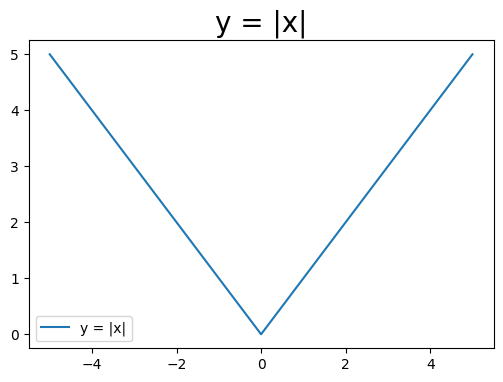

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(-5, 6)]
y = [abs(i) for i in range(-5, 6)]

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="y = |x|")
plt.title("y = |x|", size=20)
plt.legend()
plt.show()

Но мы можем сказать, что в этой точке производная равна 0.
Если аргумент модуля меньше 0, то производная будет -1.

Если больше +1

$$ \frac {\delta loss} {\delta \hat{y}} = \frac {\delta |y - \hat{y}| } {\delta {(y - \hat{y})}} \frac {\delta y - \hat{y}} {\delta \hat{y}} = \frac {\delta |y - \hat{y}| } {\delta {(y - \hat{y})}} \cdot -1 = - \frac {\delta |y - \hat{y}| } {\delta {(y - \hat{y})}} = - sign(y - \hat{y}) =  sign(\hat{y} - y)$$

<br>
<br>


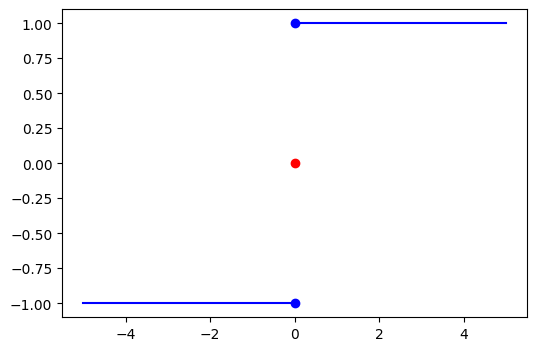

In [ ]:
x = [i for i in range(-5, 1, 1)]
y = [i * 0 - 1 for i in range(6)]
x_1 = [i for i in range(0, 6)]
y_1 = [i * 0 + 1 for i in range(0, 6)]

plt.figure(figsize=(6, 4))
plt.plot(x, y, "b")
plt.plot(x_1, y_1, "b")
plt.plot(0, 0, "ro")
plt.plot(0, 1, "bo")
plt.plot(0, -1, "bo")
plt.show()

### Max-Loss

$$b = max(x, y)$$

$$b = x~~if~~x > y~~else~~y$$


$$\frac {\delta b} {\delta x} =  \frac {\delta x} {\delta x}~~if~~x > y~~else~~\frac {\delta y} {\delta x} = 1~~if~~x > y~~else~~0$$

Если $x > y$, то он оказал влияние на $b$. Иначе его вклада в $b$ НЕ БЫЛО: градиент равен 0.




### Hinge loss

Из:

$L_i=\sum_{j\neq y_i}max(0,s_j-s_{y_i}+1)$

Получаем:

$ \nabla_W	L(W) = {1 \over N}\sum_{i=1}^N \nabla_W L_i(x_i, y_i, W)$

## Выбор шага обучения

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/update_weghts_values.png" width="450">

<!-- [Визуализация](https://docs.google.com/file/d/0Byvt-AfX75o1ZWxMRkxrUFJ2ZUE/preview)
 -->



Шаг обучения — некоторый коэффициент, как правило, небольшой, который не позволяет нам двигаться слишком быстро. У нас есть точка, в которую мы хотим попасть. Если мы сделаем слишком большой шаг, то мы ее перескочим (график справа), поэтому надо подобрать шаг, который не позволит ее перескочить, но в то же время, чтобы тот же процесс не шел слишком медленно (как на графике слева)

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/learning_rate_optimal_value.png" width="900">

Выбор слишком большого шага обучения может стать причиной нежелательного характера изменения значения функции потерь в процессе обучения. Вместо ожидаемого движения в сторону минимума, функция ошибок может начать периодически изменяться в течение цикла обучения или же вовсе продемонстрировать неограниченный рост.

В качестве иллюстрации этого эффекта рассмотрим модельный пример. Предположим, мы решаем задачу регрессии и хотим восстановить значение неизвестной скалярной функции.

Создадим синтетический датасет для функции
$y(x_1, x_2, ... , x_n) = \sum_i x_i^3$

In [ ]:
import numpy as np


np.random.seed(101)
x_train = np.random.rand(1000, 5)
noise = np.random.rand(1000, 1) / 1000
y_train = np.expand_dims(np.sum(x_train**3, axis=-1), axis=1) + noise

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

x_train shape: (1000, 5), y_train shape: (1000, 1)


Определим простейшую модель линейной регрессии. Используем MSE в качестве функции потерь:

In [ ]:
import random


class LinearRegressor:
    def __init__(self, in_features, out_features, batch_size, random_state=42):
        self.in_features = in_features  # num of inputs
        self.out_features = out_features  # num of outputs

        np.random.seed(random_state)
        self.W = (
            np.random.randn(self.in_features + 1, self.out_features) * 0.0001
        )  # generate random weights, reshape to add bias
        self.batch_size = batch_size  # batch_size

    def fit(self, x_train, y_train, learning_rate=1e-8):
        loss = 0.0  # reset loss
        train_len = x_train.shape[0]  # num of examples
        indexes = list(range(train_len))  # indexes train_len
        random.shuffle(indexes)

        for i in range(0, train_len, self.batch_size):
            idx = indexes[i : i + self.batch_size]
            x_batch = x_train[idx]
            y_batch = y_train[idx]

            x_batch = np.hstack([x_batch, np.ones((x_batch.shape[0], 1))])  # add bias

            loss_val, grad = self.loss(x_batch, y_batch)  # loss and gradient
            self.W -= learning_rate * grad  # update weigths

            loss += loss_val  # loss sum
        return loss / (train_len)  # mean loss

    def loss(self, x, y):
        """
        MSE loss
        """
        current_batch_size = x.shape[0]  # batch_size
        loss = 0.0
        dW = np.zeros(self.W.shape)
        for i in range(current_batch_size):
            y_preds_on_batch = x[i].dot(self.W)  # vector of shape out_features
            y_true_on_batch = y[i]
            loss += np.sum((y_preds_on_batch - y_true_on_batch) ** 2)
            # dW_{m, n} = 2 * x_m ((Wx)_n - y_n)
            dW += np.meshgrid(y_preds_on_batch - y_true_on_batch, x[i])[0]

        loss /= current_batch_size
        dW /= current_batch_size
        return loss, dW

    def forward(self, x):
        x = np.append(x, 1)  # add 1 (bias)
        scores = x.dot(self.W)
        return scores

Обучим нашу модель на синтетических данных и посмотрим, как будет изменяться значение функции потерь в ходе процесса обучения на 20 эпохах при использовании для обучения различных значений скорости обучения.

In [ ]:
from tqdm.notebook import tqdm


def train_and_plot_history(learning_rates_list, batch_size=64, num_epochs=20):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    for lr_id, lr in tqdm(enumerate(learning_rates_list)):
        regressor = LinearRegressor(
            in_features=x_train.shape[1], out_features=y_train.shape[1], batch_size=42
        )
        loss_hist = np.zeros(num_epochs)
        for epoch in range(num_epochs):
            loss = regressor.fit(x_train, y_train, learning_rate=lr)
            loss_hist[epoch] = loss
        ax.plot(loss_hist, label="lr={:0.1e}".format(lr))

    ax.set_xticks(range(num_epochs))
    ax.set_xlabel("epoch")
    ax.set_ylabel("MSE loss")
    # ax.set_xlim([3, 8])
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
    plt.show()

При значениях скорости обучения в диапазоне $5 \times 10^{-4} - 7 \times 10^{-4}$ мы наблюдаем ожидаемый процесс обучения модели:

0it [00:00, ?it/s]

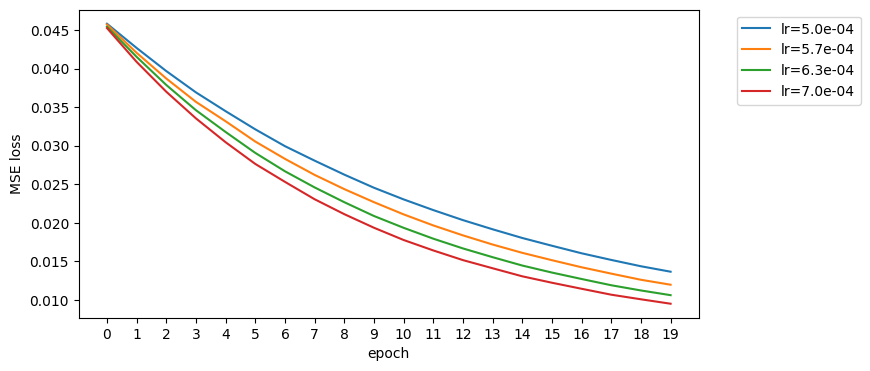

In [ ]:
train_and_plot_history(learning_rates_list=np.linspace(start=5e-4, stop=7e-4, num=4))

Понизив на несколько порядков скорость обучения, мы увидим, что за первые 20 эпох обучения модель существенно не смогла улучшить величину MSE:

0it [00:00, ?it/s]

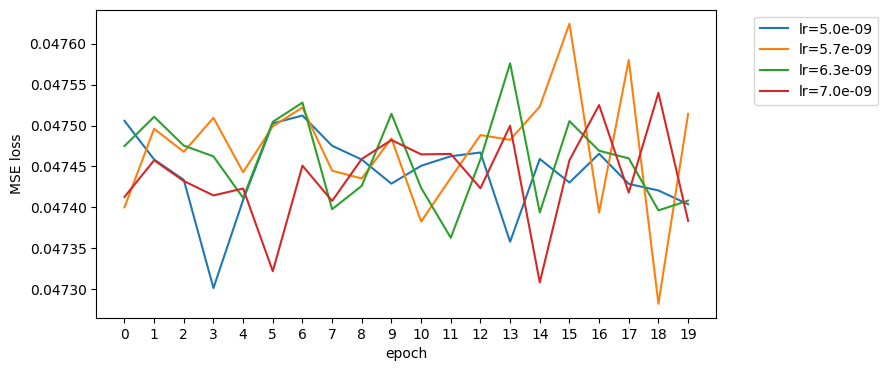

In [ ]:
train_and_plot_history(learning_rates_list=np.linspace(start=5e-9, stop=7e-9, num=4))

Если же мы наоборот увеличим на несколько порядков скорость обучения, то заметим, что функция ошибок стала изменяться хаотично, и с дальнейшим ростом скорости обучения будет стремиться неограниченно ухудшаться:

0it [00:00, ?it/s]

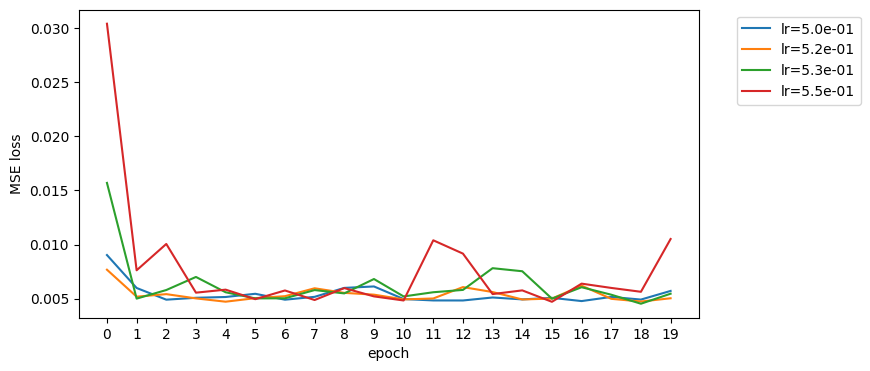

In [ ]:
train_and_plot_history(learning_rates_list=np.linspace(start=0.5, stop=0.55, num=4))

Пока изменения loss функции достаточно большие, сам по себе градиент тоже большой. За счет этого можно двигаться быстро. Когда он будет уменьшаться, мы должны оказаться рядом с этим минимумом, и шаг, который мы выбрали, не должен мешать этому процессу.

Бывают ситуации, когда шаг можно менять в самом процессе обучения: в начале обучения модели шаг большой, потом, по мере того, как она сходится, чтобы более четко найти минимум, шаг можно изменить вручную. Но изначально его нужно каким-то образом подобрать, и это зависит от данных и от самой модели. Это тоже гиперпараметр, связанный с обучением.

## Алгоритм стохастического градиентного спуска. Выбор размера батча

[Блог-пост о стохастическом градиентом спуске](https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter2_stochastic-gradient-descent.html#motivation-for-stochastic-gradient-descent)

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/define_size_of_batch.png" width="500">

Мы с самого начала говорили о выборках некоторого количества примеров. В дальнейшем мы будем называть их батчами. Батч (англ. *batch*) — это некоторое подмножество обучающей выборки фиксированного размера.

При этом было не очень понятно, чем они мотивированы. Точнее, мы мотивировали это тем, что у нас много данных, и мы не сможем их обработать все, и это правда. Даже если мы сможем загрузить все данные в память, нам нужно будет загрузить их и использовать при расчете, в том числе градиента. Это ещё более затратно.

Зачем батчи нужны при рассчете loss? Если мы посчитаем loss по одному изображению, скорее всего он будет очень специфичен, и это движение, которое произойдет, будет направлено в сторону минимума, потому что по этому конкретному изображению мы улучшим показатели, что не отражает обобщения всех данных, поэтому мы используем батчи.

Нас в первую очередь интересует более общее направление, которое будет работать на большинстве наших данных. Поэтому, если мы будем оптимизировать модели, исходя из одного элемента данных, путь будет витиеватый и процесс будет происходить достаточно долго. Если же данные не помещаются в память, то **можно использовать батч того размера, который у нас есть**. Можно загрузить в память и считать по батчам градиент. В этом случае спуск будет более плавным, чем по одному изображению.

Также при использовании всего датасета тоже есть свои минусы. **Не всегда загрузка всего датасета приводит к увеличению точности**.

Подробнее про [методы оптимизации нейронных сетей](https://habr.com/ru/post/318970/).


## Регуляризация



__Сложность модели__ (*model complexity*) — важный гиперпараметр. В частности, для линейной модели, сложность может быть представлена количеством параметров, для полиномиальных моделей — степенью полинома, для деревьев решений — глубиной дерева и т.д.

Сложность модели тесно связана с __ошибкой обобщения__ (_generalization error_). Ошибка обобщения отличается от ошибки обучения, измеряемой на тренировочных данных, тем, что позволяет оценить обобщающую способность модели, приобретенную в процессе обучения, давать точные ответы на неизвестных ей объектах. Cлишком простой модели не будет хватать мощности для обобщения сложной закономерности в данных, что приводит к большой ошибке обобщения, с другой стороны слишком сложная модель также приводит к большой ошибке обобщения за счет того, что в силу своей сложности модель начинает пытаться искать закономерности в шуме, добиваясь большей точности на тренировочных данных, теряя при этом часть обобщающей способности.

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/model_complexity.png" width="500">

Проиллюстрируем описанное явление на примере полиномиальной модели:

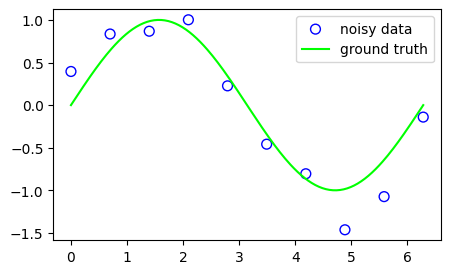

In [ ]:
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x) + np.random.normal(scale=0.25, size=len(x))
x_true = np.linspace(0, 2 * np.pi, 200)
y_true = np.sin(x_true)

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=50, facecolors="none", edgecolors="b", label="noisy data")
plt.plot(x_true, y_true, c="lime", label="ground truth")
plt.legend()
plt.show()

Попробуем аппроксимировать имеющуюся зависимость с помощью полиномиальной модели, используя шумные данные в качестве тренировочных данных:

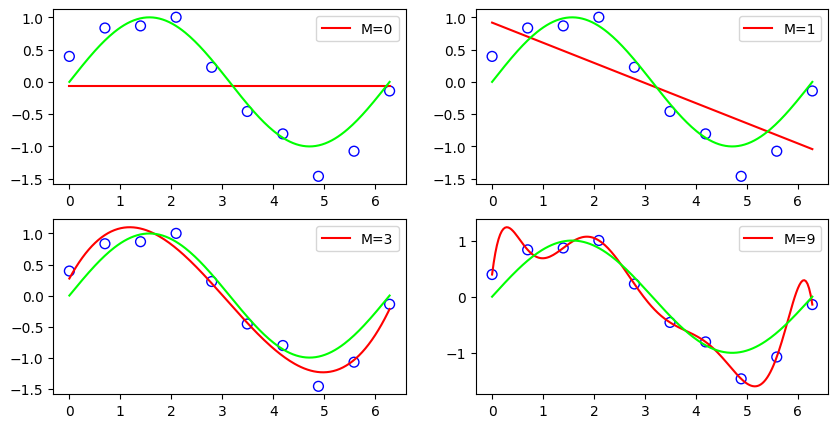

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

x_train = x.reshape(-1, 1)

fig = plt.figure(figsize=(10, 5))

for i, degree in enumerate([0, 1, 3, 9]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_train, y)
    y_plot = model.predict(x_true.reshape(-1, 1))

    fig.add_subplot(2, 2, i + 1)
    plt.plot(x_true, y_plot, c="red", label=f"M={degree}")
    plt.scatter(x, y, s=50, facecolors="none", edgecolors="b")
    plt.plot(x_true, y_true, c="lime")
    plt.legend()
plt.show()

Видно, что модель может переобучаться, подстраиваясь под тренировочную выборку. В полиноме степень, и, как следствие, количество весов — это гиперпараметр, который можно подбирать на кросс-валидации, однако когда мы таким образом подбираем сложность модели, мы накладываем довольно грубое ограничение на обобщающую способность модели в целом. Вместо этого более разумным было бы оставить модель сложной, но использовать некий ограничитель (__регуляризатор__), который будет заставлять модель отдавать предпочтение выбору более простого обобщения.

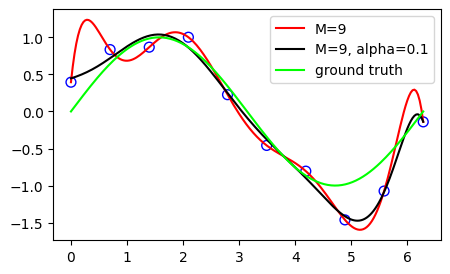

Without regularization:  y = 0.0+7.3*x+-21.31*x^2+25.13*x^3+-14.79*x^4+4.69*x^5+-0.8*x^6+0.06*x^7+-0.0*x^8+-0.0*x^9
With regularization:  y = 0.0+0.24*x+0.16*x^2+0.15*x^3+-0.01*x^4+-0.23*x^5+0.15*x^6+-0.04*x^7+0.0*x^8+-0.0*x^9


In [ ]:
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(9), LinearRegression())
model_ridge = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.1))

model.fit(x_train, y)
y_plot = model.predict(x_true.reshape(-1, 1))

model_ridge.fit(x_train, y)
y_plot_ridge = model_ridge.predict(x_true.reshape(-1, 1))

plt.figure(figsize=(5, 3))
plt.plot(x_true, y_plot, c="red", label=f"M={degree}")
plt.plot(x_true, y_plot_ridge, c="black", label=f"M={degree}, alpha=0.1")
plt.scatter(x, y, s=50, facecolors="none", edgecolors="b")
plt.plot(x_true, y_true, c="lime", label="ground truth")
plt.legend()
plt.show()

poly_coef = model[1].coef_

eq = f"y = {round(poly_coef[0], 2)}+{round(poly_coef[1], 2)}*x"
for i in range(2, 10):
    eq += f"+{round(poly_coef[i], 2)}*x^{i}"

print("Without regularization: ", eq)

poly_coef = model_ridge[1].coef_

eq = f"y = {round(poly_coef[0], 2)}+{round(poly_coef[1], 2)}*x"
for i in range(2, 10):
    eq += f"+{round(poly_coef[i], 2)}*x^{i}"

print("With regularization: ", eq)

Видно, что одним из "симптомов" переобучения являются аномально большие веса. Модель Ridge Regression, показанная в примере выше, использует L2-регуляризацию для борьбы с этим явлением.

$$\large L2\;Regularization: R(W) = \sum_k \sum_l W^2_{k,l}$$



$x=[1,1,1,1]$

$w_1=[1,0,0,0]$

$w_2=[0.25,0.25,0.25,0.25]$

$w_1^Tx=w_2^Tx=1$

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/l2_regularization.png" width="300">

L2 Regularization = weights decay

Идея состоит в том, что мы можем наложить некоторое требование на сами веса. Дело в том, что можно получить один и тот же выход модели при разных весах (выход модели соответствует умножению весов на $x$), при разных $w$ выход может быть идентичен.

Эти параметры задают некоторую аппроксимацию нашей целевой функции. Аппроксимировать функцию можно двумя способами:
1. Использовать все имеющиеся данные и провести ее строго через все точки, которые нам известны;
2. Использовать более простую функцию (в данном случае, линейную), которая не попадет точно во все данные, но зато будет соответствовать некоторым общим закономерностям, которые у них есть.

Характерной чертой переобучения является второй сценарий, и сопровождается он, как правило, большими весами. Введение L2-регуляризации приводит к тому, что большие веса штрафуются и предпочтение отдается решениям, использующим малые значения весов.

Модель может попробовать схитрить и по-другому: использовать все веса, все признаки, даже незначимые, но с маленькими коэффициентами. С этим L2-loss поможет хуже, так как он не сильнее штрафует мелкие веса. Результат его применения — малые значения весов, которые использует модель

В этом случае на помощь приходит L1-loss, который штрафует вес за сам факт отличия его от нуля. Но и штрафует он все веса одинаково. Результат его применения — малое число весов, которые использует модель в принципе.

<img src="https://edunet.kea.su/repo/EduNet-content/L02/out/l1_and_l2_regularization.gif" alt="alttext" width="550"/>


Это лоссы можно комбинировать — получится Elastic Net


$\lambda=$ regularization strength (hyperparameter)

$L(W)=\underbrace{\frac1N\sum_{i=1}^NL_i(f(x_i,W),y_i)}_{\textbf{Data loss} }+\underbrace {\lambda R(W)}_{\textbf{Regularization}}$

Берем сумму всех весов по всей матрице $w$ и добавляем ее к loss. Соответственно, чем больше будет эта сумма, тем больше будет суммарный loss.

В дальнейшем проблема с переобучением будет вставать довольно часто. Методов регуляризации модели существует достаточно много. Этот — один из базовых, который будет использоваться практически во всех оптимизаторах, с которыми познакомимся позже.

# Обобщенные линейные модели

## Kernel SVM

Данные не всегда могут быть хорошо разделены (гипер)плоскостью. Например, рассмотрим следующее: у нас есть данные по дозировке лекарства и 2 класса — пациенты, которые поправились, и те, которым лучше не стало.

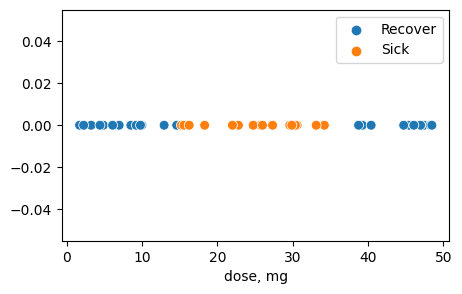

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


def generate_patients_data(total_len=40):
    x = np.random.uniform(0, 50, total_len)
    y = np.zeros_like(x)
    y[(x > 15) & (x < 35)] = 1
    return x, y


def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x, y=np.zeros(len(x)), hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Recover", "Sick"])
    ax.set(xlabel="dose, mg")
    return ax


total_len = 40
x, y = generate_patients_data(total_len=total_len)
ax = plot_data(x, y, total_len=total_len)
plt.show()

Соответственно, мы не можем найти такое пороговое значение, которое будет разделять наши классы на больных и здоровых, а, следовательно, и Support Vector Classifier работать тоже не будет.  Для начала давайте преобразуем наши данные таким образом, чтобы они стали 2-хмерными. В качестве значений по оси Y будем использовать дозу, возведенную в квадрат (**доза**$^2$).

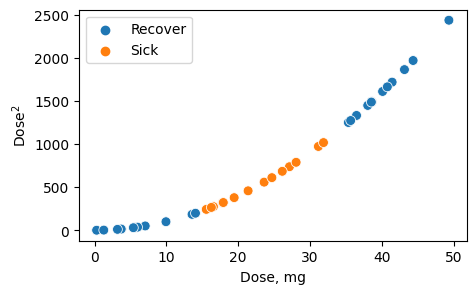

In [ ]:
def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x[0, :], y=x[1, :], hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Recover", "Sick"])
    ax.set(xlabel="Dose, mg")
    ax.set(ylabel="Dose$^2$")
    return ax


total_len = 40
x_1, y = generate_patients_data(total_len=total_len)
x_2 = x_1**2
x = np.vstack([x_1, x_2])

plot_data(x, y, total_len=40, s=50)
plt.show()

Теперь мы можем вновь использовать Support Vector Classifier для классификации

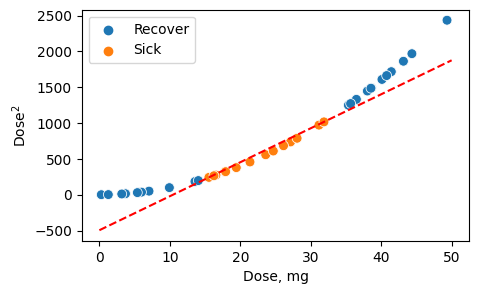

In [ ]:
plot_data(x, y, total_len=40, s=50)

x_arr = np.linspace(0, 50, 50)
xs = [x[0, :][y == 1].min(), x[0, :][y == 1].max()]
ys = [x[1, :][y == 1].min(), x[1, :][y == 1].max()]

# Calculate the coefficients.
coefficients = np.polyfit(xs, ys, 1)

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
y_axis = polynomial(x_arr)

# ...and plot the points and the line
plt.plot(x_arr, y_axis, "r--")
plt.show()

Но тут возникает резонный вопрос: почему мы решили возвести в квадрат? Почему не в куб? Или, наоборот, не извлечь корень? Как нам решить, какое преобразование использовать?

И у нас есть **вторая проблема** — а если перейти надо в пространство очень большой размерности? В этом случае наши данные очень сильно увеличатся в размере.

Комбинация двух проблем дает нам **много сложности**: надо перебирать большое число возможных пространств большей размерности


Однако основная фишка Support Vector Machine состоит в том, что внутри он работает на скалярных произведениях. И можно эти скалярные произведения считать, **не переходя в пространство большей размерности**

Для этого SVM использует **Kernel Function**.

Kernel Function может, например, быть полиномом (**Polynomial Kernel Function**), который имеет параметр $d$ — сколько размерностей выбрать.


<img src="https://edunet.kea.su/repo/EduNet-content/L02/out/svm_kernel_function.png" width="700">


Примеры ядер :

* $k(x_i, x_j) = (<x_i, x_j> + c)^d, с, d \in \mathbb{R}$ — полиномиальное ядро, считает расстояние между объектами в пространстве размерности d

* $k(x_i, x_j) = \frac{1}{z} e^{-\frac{h(x_i, x_j)^2}{h}}$ — радиальная базисная функция RBF

Таким образом, в случае SVM можно легко перебрать много таких пространств на кросс-валидации и выбрать более удобное.

Более того, SVM может проверять пространства признаков бесконечного размера, если для такого пространства существует kernel function. Для решения практических задач иногда такие бесконечномерные пространства признаков могут оказаться удобными. Широко применяемое на практике RFB ядро как раз соответствует такому случаю бесконечномерного пространства признаков.


# Вероятностный подход в задаче классификации

## Наивный Байесовский классификатор

Можно построить модель классификации, которая будет напрямую оценивать вероятность принадлежности объекта к интересующему нас классу просто на основе информации о распределении объектов по классам в обучающей выборке. Базовую идею такого примера легко продемонстрировать на следующем примере данных.

Загрузим `DataFrame` датасета [Wine](https://archive.ics.uci.edu/ml/datasets/wine), который являлся примером табличных данных в нашей первой лекции:

In [ ]:
import sklearn
from sklearn.datasets import load_wine

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

# Download dataset
features, class_labels = load_wine(
    return_X_y=True, as_frame=True
)  # also we can get data in Bunch (dictionary) or pandas DataFrame

wine_dataset = features
wine_dataset["target"] = class_labels

wine_dataset.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

Возьмём первый признак `alcohol`. По имеющийся таблице с данными легко построить функцию распределения $F(X)$, которая будет задавать вероятность $p(\text{alcohol} = X)$ найти среди наших данных бутылку вина с параметром `alcohol` равным $X$.

$$\large p(\text{alcohol} = X):$$

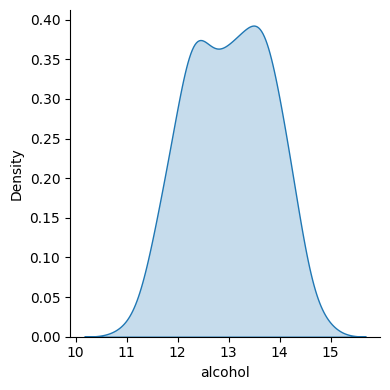

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.displot(wine_dataset, x="alcohol", kind="kde", fill=True, height=4)
plt.show()

наш датасет содержит объекты 3 различных классов:

In [ ]:
wine_dataset.target.unique()

array([0, 1, 2])

Потому мы можем построить распределение объектов в обучающей выборке по признаку `alcohol` отдельно для каждого из этих трёх классов. Эти распределения зададут нам условную вероятность $p(\text{alcohol} = X |\text{target} = i)$ того что объект имеет значение признака `alcohol` равным $X$ при условии, что он относится к одному из классов с номером $i$.

$$\large p(\text{alcohol} = X|\text{target} = i):$$

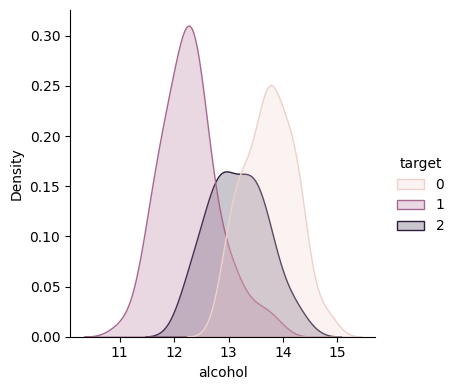

In [ ]:
sns.displot(wine_dataset, x="alcohol", hue="target", kind="kde", fill=True, height=4)
plt.show()

Для решения задачи классификации нам теперь достаточно просто обернуть данную формулу для условной вероятности по [теореме Байеса](https://en.wikipedia.org/wiki/Bayes'_theorem) и получить вероятность того что объект принадлежит классу $i$ при условии того что признак `alcohol` у него принимает значение $X$:
$$\large p(\text{target} = i | \text{alcohol} = X) = \frac{p(\text{alcohol} = X | \text{target} = i )p(\text{target} = i )}{p(\text{alcohol} = X)},$$

где $p(\text{target} = i)$ будет просто задавать как часто в датасете встречаются объекты класса $i$.

Если мы будем считать распределение объектов по значениям признаков независимыми (например, предполагая, что $p(\text{alcohol}=X_1, \text{malic_acid}=X_2) = p(\text{alcohol}=X_1)p(\text{malic_acid}=X_2)$), именно это допущение о независимости распределений и приводит к использованию слова *наивный* в названии подхода), то можем записать в общем случае:

$$\large p(\text{target} = i |\text{Features} = \vec X ) = \frac{p(\text{Feature}_1 = X_1, \text{Feature}_2 = X_2,\dots,\text{Feature}_n = X_n | \text{target} = i )p(\text{target} = i )}{p(\text{Feature}_1 = X_1) p(\text{Feature}_2 = X_2)\dots p(\text{Feature}_n = X_n)}$$

Если мы решаем задачу классификации на $k$ классов, то для объекта с набором признаком $\vec X$ по формуле выше мы получим $k$ чисел, характеризующих вероятность принадлежности данного объекта к различным классам. Для финального принятия решения нам останется выбрать тот класс, для которого вероятность принадлежности наивысшая:

$$\large \text{Prediction} = \underset{i}{\text{argmax}}{\left(p(\text{target} = i |\text{Features} = \vec X )\right)}.$$

Наивный Байесовский классификатор часто используют в задаче обнаружения спама и пример его использования в такой задаче может показаться ещё более наглядным.
В рамках данной задачи у нас имеется:
- Датасет из текстов сообщений с некоторым фиксированным словарём возможных слов.
- Два класса сообщений: спам и нормальное.
- Признаковое описание для каждого сообщения характеризует количество вхождений каждого из слов словаря в текст сообщения.


На основе этой информации нам нужно научиться отделять нормальные письма от спама. Все письма состоят из 4-х слов: **‘Добрый’, ‘День’, ‘Гости’, ‘Деньги’**. При этом мы уже посчитали, сколько раз каждое слово встречается в каждом классе.

Мы можем посчитать вероятность встретить слово **‘Добрый’** в нормальном письме: берем количество слов **‘Добрый’** и делим на количество слов во всех нормальных письмах (с повторениями). Аналогично для других слов.

[Источник картинок](https://www.youtube.com/watch?v=O2L2Uv9pdDA)

<center><img src="https://edunet.kea.su/repo/EduNet-content/L02/out/naive_bayes_1.png" alt="alttext" width=900/></center>

Делаем то же самое для слов из спама.

<center><img src="https://edunet.kea.su/repo/EduNet-content/L02/out/naive_bayes_2.png" alt="alttext" width=900/></center>

Считаем вероятность того, чтобы письмо было нормальным. Для этого количество нормальных писем делим на общее количество писем. Аналогично для спама. Это — $p(\text{target} = i)$ в формуле выше.

<center><img src="https://edunet.kea.su/repo/EduNet-content/L02/out/naive_bayes_3.png" alt="alttext" width=900/></center>

Чтобы получить вероятность нормального письма с фразой **‘Добрый День’** в "наивном" предположении мы можем перемножить вероятности нормального письма со словом **‘Добрый’** и нормального письма со словом **‘День’**. Это произведение будет $p(\text{target} = i | \text{Features} = \vec X)$ в формуле выше.

Считаем $p(\text{Features} = \vec X|\text{target} = i) p(\text{target} = i)$:

<center><img src="https://edunet.kea.su/repo/EduNet-content/L02/out/naive_bayes_3_5.png" alt="alttext" width=900/></center>

Вернёмся к нашему примеру с датасетом Wine и попробуем решить задачу классификации для него при помощи предложенного алгоритма:

Как обычно, разделим наш датасет на тренировочную и валидационную выборки:

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    features.values, class_labels.values, test_size=0.25, random_state=42
)

Возьмём реализацию Наивного Байесовского классификатора из [библиотеки sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). Обучим её на тренировочном датасете и измерим качество на отложенной валидационной выборке:

In [ ]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

# Train the model
model = GaussianNB()
model.fit(x_train, y_train)

# Calculate F1_score
pred = model.predict(x_test)
f1_score(y_test, pred, average="macro")

1.0

Благодаря простоте модельного датасета Wine наша наивная статистическая модель показала отличное качество работы, для решения большинства практических задач на реальных датасетах не следует ожидать настолько же высокого качества. Тем не менее, подход к решению задачи классификации, связанный с построением модели предсказания принадлежности объекта к имеющимся классам, оказался крайне конструктивным. Такой подход можно попробовать применить в общем случае.

## Кросс-энтропия как общая функция потерь для задач классификации

### Переход к вероятностям

**Softmax**

[Видео от StatQuest, которое объясняет Softmax](https://www.youtube.com/watch?v=KpKog-L9veg)

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/scores_to_probability.png" width="750">

Перейти к вероятностям мы сможем, проведя с весами некоторые не очень сложные математические преобразования.

На слайде выше показано, почему выходы модели часто называют [logit’ами](https://en.wikipedia.org/wiki/Logit). Если предположить, что у нас есть некая вероятность, от которой мы берем такую функцию (logit), то результат может принимать значение в любых вещественных числах. Мы можем считать, что выходы модели — это logit’ы.

Например, мы могли бы просто взять индекс массива, в котором значение (logit) максимально. Предположим, что наша модель выдала следующие значения:

In [ ]:
logits = [
    5.1,  # cat
    3.2,  # car
    -1.7,  # frog
]

Тогда, чтобы узнать какой класс наша сеть предсказала, мы могли бы просто взять `argmax` от наших `logits`

In [ ]:
import numpy as np

print("Predicted class = %i (Cat)" % (np.argmax(logits)))

Predicted class = 0 (Cat)


Но от argmax нельзя посчитать градиент, так как производная от константы равна 0. Соответственно, если бы мы вставили производную от argmax в градиентный спуск, мы бы получили везде нули, и соответственно, наша модель бы вообще ничему не научилась

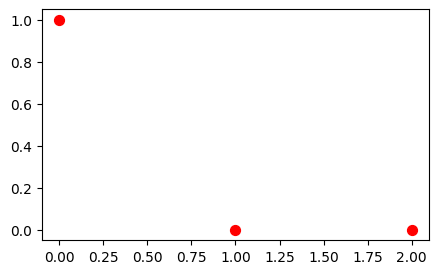

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(np.arange(3), [1, 0, 0], color="red", s=50)
plt.show()

А мы бы хотели получить не logit’ы, а настоящую вероятность на выходе модели. Да еще и таким образом, чтобы от наших вероятностей можно было посчитать градиент. Для этого мы можем применить к нашим логитам функцию **Softmax**

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/linear_classifier_softmax.png" width="600">



Функция SoftMax:

$s=f(x_i; W);$

$ \displaystyle P(Y=k|X=x_i) = \frac{e^{s_k}}{\sum_je^{s_j}}.$

1. Отобразим наши logit’ы на значения $[0, +∞)$.

Для этого возведем экспоненту (число Эйлера 2.71828) в **степень логита**. В результате, мы получим вектор гарантированно неотрицательных чисел (положительное число, возведенное в степень, даже отрицательную, даст положительное значение).

2. Нормализуем.

Чтобы  интерпретировать числа как вероятности, их сумма должна быть равна единице. Мы должны их нормализовать, то есть **поделить на сумму**.

Это преобразование называется **Softmax функцией**. **Получаются вероятности**, то есть числа, которые можно интерпретировать, как вероятности.

$\large \displaystyle \text{Softmax}_\text{кошка} = \frac{e^{5.1}}{e^{5.1} + e^{3.2} + e^{-1.7}}$

In [ ]:
def softmax(logits):
    return np.exp(logits) / np.sum(np.exp(logits))


print(softmax(logits))
print("Sum = %.2f" % np.sum(softmax(logits)))

[0.86904954 0.12998254 0.00096793]
Sum = 1.00


Можно обратить внимание, что Softmax никоим образом не поменял порядок значений. Самому большому logit'у соответствует самая большая вероятность, а самому маленькому, соответственно, самая маленькая.

Посмотрим на графиках. Возьмем массив случайных логитов и применим к ним softmax

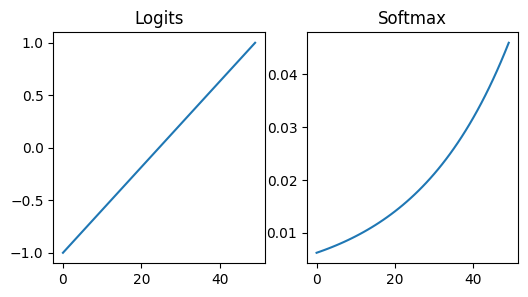

In [ ]:
rand_logits = np.linspace(-1, 1, 50)
fig, ax = plt.subplots(ncols=2, figsize=(6, 3))

ax[0].plot(np.arange(50), rand_logits)
ax[0].set_title("Logits")
ax[1].plot(np.arange(50), softmax(rand_logits))
ax[1].set_title("Softmax")
plt.show()

#### Практическое вычисление SoftMax

При вычислении экспоненты от выходов модели могут получиться очень большие числа в силу очень высокой скорости роста экспоненты. Этот факт необходимо учитывать, чтобы вычисления SoftMax были численно стабильны:

In [ ]:
from warnings import simplefilter

simplefilter("ignore", category=RuntimeWarning)

f = np.array([123, 456, 789])
p = np.exp(f) / np.sum(np.exp(f))
print(f, p)

[123 456 789] [ 0.  0. nan]


Чтобы регуляризовать вычисление, нам следует предварительно упростить возникающую в вычислении дробь. Для этого мы можем вычесть из каждого $s_i$ положительную константу, чтобы уменьшить значения экспонент. В качестве константы можно выбрать максимальный элемент этого вектора, тогда у нас гарантированно не будет очень больших чисел, и такой способ будет работать более стабильно.

$$M = \max_j s_{y_{j}}$$
$$s^{new}_{y_{i}}  = s_{y_{i}} - M $$

$$ \dfrac {e^{s^{new}_{y_{i}}}} {\sum_j e^{s^{new}_{y_{j}}}}  = \dfrac {e^{s_{y_{i}} - M }} {\sum_j e^{s_{y_{j}} - M }} = \dfrac {e^{s_{y_{i}}}e ^ {-M}} {\sum_j e^{s_{y_{j}}} e ^ {-M}} = \dfrac {e ^ {-M} e^{s_{y_{i}}}} {e ^ {-M} \sum_j e^{s_{y_{j}}} } = \dfrac { e^{s_{y_{i}}}} { \sum_j e^{s_{y_{j}}} }$$

In [ ]:
f = np.array([123, 456, 789])
f -= f.max()
p = np.exp(f) / np.sum(np.exp(f))
print(f, p)

[-666 -333    0] [5.75274406e-290 2.39848787e-145 1.00000000e+000]


### Расстояние (дивергенция) Кульбака — Лейблера

Теперь нам нужно сравнить полученные вероятности с истинными метками классов.

В математической статистике и теории информации в мерой расхождения между двумя вероятностными распределениями $P$ и $Q$ является расстояние (дивергенция) Кульбака — Лейблера, вычисляемое по формуле
$$D_{KL}(P||Q) = ∑_i P(i)\log\frac{P(i)}{Q(i)}$$

Попробуем разобраться, что значит эта формула на примере двух монеток:
- настоящей с вероятностями орла и решки 0.5 и 0.5 соответственно,
- фальшивой с вероятностями орла и решки 0.2 и 0.8 соответственно.

Возьмем настоящую монету и произведем 10 бросков (выборок). Получили последовательность $\color{blue}{О О} \color{green}{Р} \color{blue}{О О} \color{green}{Р} \color{blue}{О О О} \color{green}{Р}$, где $\color{blue}{O}$ — это орел, $\color{green}{Р}$ — это решка.
Посчитаем вероятности выбросить такую последовательность для настоящей и фальшивой монеты. Броски независимые, поэтому значения вероятностей перемножаются.

<img src="https://edunet.kea.su/repo/EduNet-content/L02/out/kl_divergence_1.png" width="900">

Запишем пропорцию вероятностей данной комбинации для настоящей монетки и для фальшивой (независимые случайные величины, вероятности перемножаются). Для заданных значений вероятностей пропорция будет примерно $149:1$.

$$\frac{\color{blue}{p_1^{N_о}}\color{green}{p_2^{N_р}}}
{\color{blue}{q_1^{N_о}}\color{green}{q_2^{N_р}}}=
\frac{\color{blue}{\left(\frac{1}{2}\right)^{7}}\color{green}{\left(\frac{1}{2}\right)^{3}}}
{\color{blue}{\left(\frac{1}{5}\right)^{7}}\color{green}{\left(\frac{4}{5}\right)^{3}}}\approx \frac{149}{1}$$

Возьмем логарифм от этого значения (это позволит нам избавиться от степеней и заменить умножение сложением) и нормируем на количество бросков монетки $N=\color{blue}{N_о}+\color{green}{N_р}$.

$$\frac{\color{blue}{N_о}}{N}\log{\color{blue}{p_1}}+
\frac{\color{green}{N_р}}{N}\log{\color{green}{p_2}}-
\frac{\color{blue}{N_о}}{N}\log{\color{blue}{q_1}}-
\frac{\color{green}{N_р}}{N}\log{\color{green}{q_2}}$$

При увеличении количества бросков $N\to∞$, так как мы бросали настоящую монетку

$$\frac{\color{blue}{N_о}}{N} \to \color{blue}{p1}, \frac{\color{green}{N_р}}{N} \to \color{green}{p2} .$$

Получаем расстояние Кульбака — Лейблера.

$$D_{KL}(P||Q) = \color{blue}{p_1} \log{\color{blue}{p_1}}
+ \color{green}{p_2}\log{\color{green}{p_2}}
- \color{blue}{p_1}\log{\color{blue}{q_1}}
- \color{green}{p_2}\log{\color{green}{q_2}}$$

$$ = \color{blue}{p_1} \log{\color{blue}{\frac{p_1}{q_1}}}
+ \color{green}{p_2} \log{\color{green}{\frac{p_2}{q_2}}}$$

Обратим внимание, что если $P=Q$, то

$$D_{KL}(P||Q) = ∑_i P(i)\log\frac{P(i)}{Q(i)} = 0$$

#### Переход к оценке модели

Мы научились определять близость двух распределений. Как это поможет нам оценить качество модели, если мы знаем, какие метки классов должны получиться?

Пусть $P$ — вероятности истинных меток классов для объекта (1 для правильного класса, 0 для остальных), $Q(\theta)$ — вероятности классов для объекта, предсказанные моделью с обучаемыми параметрами $\theta$.

Расстояние Кульбака — Лейблера между истинными и предсказанными значениями

$$D_{KL}(P||Q(\theta)) = ∑_i P(i)\log\frac{P(i)}{Q(i| \theta)} $$

$$ = ∑_i P(i)\log{P(i))} -  ∑_i P(i)\log{Q(i|\theta)} $$

$$ = - H(P) + H(P|Q(\theta))$$

Мы разбили сумму на две части, первая из которых называется **энтропией** $H(P)$ и не будет зависеть от модели, а вторая называется **кросс-энтропией** $H(P|Q(\theta))$.



#### Энтропия

Понятие энтропии пришло из теории связи. Для расчета энтропии можно использовать формулу Шеннона:

$$H(P)=-\sum^C_{i=1}P(i)\cdot log_{2}(P(i)),$$
где C &mdash; количество классов.


В формуле Шеннона не случайно используется логарифм по основанию 2. Она рассчитывает, **сколько бит информации минимально необходимо для передачи одного значения**, например, одного исхода броска монетки.

Если монетка **всегда выдает орел**, то нам нет смысл передавать информацию, чтобы предсказать исход

$$H(\color{blue}{p_1 = 1}, \color{green}{p_2 = 0}) = 0$$


Для настоящей монетки необходимо будет передавать 1 бит информации на бросок
$$H(\color{blue}{p_1 = 0.5},  \color{green}{p_2 = 0.5})= log_{2}(2) = 1,$$

А вот с поддельной монеткой получается интереснее: если сделать много бросков, можно выявить закономерность что решка выпадет чаще (вероятность трех решек подряд будет больше вероятности одного орла) и за счет этого сократить количество передаваемой информации так, чтобы на один бросок получалось меньше 1 бита. Как это сделать — отдельная область теории информации, называемая **кодирование источника**.
$$H(\color{blue}{q_1 = 0.2}, \color{green}{q_2 = 0.8}) = 0.722$$

__Энтропия__ — мера неуверенности, связанная с распределением $P$.
Зная истинное распределение случайной величины, мы можем рассчитать его энтропию.

Если мы попытаемся использовать статистические данные, полученные для фальшивой монеты $Q$, для настоящей $P$, мы не получим выигрыш в количестве передаваемой информации:

$$H(P||Q) = - \sum^C_{i=1}P(i)\cdot log_2(Q(i)) = 1.322$$

Формула выше называется **кросс-энтропия**.

**Кросс-энтропия** позволяет оценить ситуацию, когда мы аппроксимируем истинное распределение $P$ предсказанным распределением $Q$. Чем больше значения кросс-энтропии, тем больше расхождение между распределениями. Поэтому кросс-энтропию используют в качестве **функции потерь**.




Как мы показали выше, **кросс-энтропия** связана с **энтропией** и **расстоянием Кульбака — Лейблера**
$$H(P||Q) = D_{KL}(P||Q) + H(P).$$

Посчитаем значения для наших монеток с помощью кода:

In [ ]:
# normal coin
p1 = 0.5
p2 = 0.5

# fake coin
q1 = 0.2
q2 = 0.8

In [ ]:
# Kullback–Leibler divergence
div_kl = p1 * np.log2(p1 / q1) + p2 * np.log2(p2 / q2)
print(f"Dkl(P||Q) = {div_kl:.3f}")

# Entropy normal coin
h_p = -p1 * np.log2(p1) - p2 * np.log2(p2)
print(f"H(P) = {h_p:.3f}")

# Entropy fake coin
h_q = -q1 * np.log2(q1) - q2 * np.log2(q2)
print(f"H(Q) = {h_q:.3f}")

# Cross-entropy
h_p_q = -p1 * np.log2(q1) - p2 * np.log2(q2)
print(f"H(P||Q) = {h_p_q:.3f}")
print(f"H(P||Q) = Dkl(P||Q) + H(P) = {h_p+div_kl:.3f}")

Dkl(P||Q) = 0.322
H(P) = 1.000
H(Q) = 0.722
H(P||Q) = 1.322
H(P||Q) = Dkl(P||Q) + H(P) = 1.322


## Расчет функции потерь

Вернемся к задаче классификации изображения. Рассчитаем для предсказания модели Cross-Entropy loss.

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/logits_to_scores_to_probabilitys.png" width="900">

В расчетах выше мы использовали логарифм по основанию 2, что приближало нас к теории информации. Мы можем считать кросс-энтропию по натуральному логарифму, она будет отличаться умножением на константу.

$$H(P||Q)=-1⋅\log{0.869}-0\cdot\log{0.13}-0\cdot\log{0.001}\approx0.14$$

In [ ]:
def cross_entropy_loss(pred_prob, true_prob):
    return -np.dot(true_prob, np.log(pred_prob))


print(f"Logits = {logits}")

pred_prob = softmax(logits)
print(f"Predicted Probabilities = {pred_prob}")

true_prob = [1.0, 0.0, 0.0]
print(f"True Probabilities = {true_prob}")

print(f"Cross-entropy loss = {cross_entropy_loss(pred_prob, true_prob):.3f}")

Logits = [5.1, 3.2, -1.7]
Predicted Probabilities = [0.86904954 0.12998254 0.00096793]
True Probabilities = [1.0, 0.0, 0.0]
Cross-entropy loss = 0.140


### Кросс-энтропия vs Hinge loss

**Cross-entropy / log loss**

<img src ="https://edunet.kea.su/repo/EduNet-content/L02/out/cross_entropy_plot_loss_with_probability.png" width="800">

$ \displaystyle \large L_i = -log\left(\frac{e^{s_{y_i}}}{\sum_je^{s_j}}\right)$

Преимуществом Cross-Entropy loss (слева) по сравнению с кусочно-гладкой SVM-Loss (справа) является:
- гладкость и отсутствие участка с плато (не имеет нулевых производных или неопределенных точек),
- большой градиент для большого Loss, маленький вблизи 100% точности (для кусочно гладкой функции градиент ноль или константа).

### Градиент функции потерь. Кросс-энтропия




[Cross Entropy Loss](https://wandb.ai/wandb_fc/russian/reports/---VmlldzoxNDI4NjAw#:~:text=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BA%D1%80%D0%B5%D1%81%D1%82%D0%BD%D0%BE%D0%B9%20%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D0%B8%20%E2%80%93%20%D1%8D%D1%82%D0%BE,%2C%20%D0%B3%D0%B4%D0%B5%200%20%E2%80%93%20%D0%B8%D0%B4%D0%B5%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.)

$$ -L = \sum_i y_i \log p_i = \sum_i y_i \log(\dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}})$$

$$s_{y_i} = w_i x$$

$$ \dfrac {\partial L} {\partial w_i} = \dfrac {\partial L} {\partial s_{y_i}} \dfrac {\partial s_{y_i}} {\partial w_i} $$

$$\dfrac {\partial s_{y_i}} {\partial w_i} = x$$

Только один $y_k = 1$


$$ -L = y_k \log p_i = \log(\dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}})$$

i = k

$$ -L = \log(\dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}}) = \log e^{s_{y_i}} - \log  \sum_j e^{s_{y_j}}  = s_{y_i} - \log  \sum_j e^{s_{y_j}}$$

$$\dfrac {\partial -L} {\partial s_{y_i}} = 1 - \dfrac 1 {\sum_j e^{s_{y_j}}} \cdot \dfrac {\partial {\sum_j e^{s_{y_j}}}} {\partial s_{y_i}} = 1 - \dfrac 1 {\sum_j e^{s_{y_i}}} \cdot \dfrac {\partial e^{s_{y_i}}} {\partial s_{y_i}} = 1 - \dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}} = 1 - p_i$$

$$\dfrac {\partial L} {\partial s_{y_j}} = p_i - 1 $$

$$ \dfrac {\partial L_i} {\partial w_i}  = \dfrac {\partial L} {\partial s_{y_i}} \dfrac {\partial s_{y_i}} {\partial w_i} = (p_i - 1) x $$

i != k

$$ -L = \log(\dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}}) = \log e^{s_{y_k}} - \log  \sum_j e^{s_{y_j}}  = s_{y_k} - \log  \sum_j e^{s_{y_j}}$$

$$\dfrac {\partial -L} {\partial s_{y_i}} = - \dfrac 1 {\sum_j e^{s_{y_j}}} \cdot \dfrac {\partial {\sum_j e^{s_{y_j}}}} {\partial s_{y_i}} =  \dfrac 1 {\sum_j e^{s_{y_i}}} \cdot \dfrac {\partial e^{s_{y_i}}} {\partial s_{y_i}} = \dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}} = - p_i$$

$$\dfrac {\partial L} {\partial s_{y_j}} = p_i $$
$$ \dfrac {\partial L_i} {\partial w_i}  = \dfrac {\partial L} {\partial s_{y_i}} \dfrac {\partial s_{y_i}} {\partial w_i} = p_i x $$



В коде это будет выглядеть вот так:

In [ ]:
# Input batch of 2 vector with 4 elements
x = np.array([[1, 2, 3, 4], [1, -2, 0, 0]])
# Weights
W = np.random.randn(3, 4)  # 3 class

# model output
logits = x.dot(W.T)
print("Scores(Logits) \n", logits, "\n")

# Probabilities
probs = softmax(logits)  # defined before
print("Probs \n", probs, "\n")

# Ground true classes
y = [0, 1]

# Derivative
probs[np.arange(2), y] = -1  # substract one from true class prob
dW = x.T.dot(probs)  # dot product with input

print("Grads dL/dW \n", dW)  # have same shape as W

Scores(Logits) 
 [[-8.18596096  2.85515452  2.2492031 ]
 [ 0.68506177 -0.93389703  0.19502048]] 

Probs 
 [[9.14739601e-06 5.70680466e-01 3.11337656e-01]
 [6.51528926e-02 1.29071046e-02 3.99127338e-02]] 

Grads dL/dW 
 [[-0.93484711 -0.42931953  0.35125039]
 [-2.13030579  3.14136093  0.54284984]
 [-3.          1.7120414   0.93401297]
 [-4.          2.28272186  1.24535062]]


# Пример обучения линейного классификатора с hinge loss

Опишем модель:

In [ ]:
import random
import numpy as np


class LinearClassifier:
    def __init__(self, labels, batch_size, imgsize=28, nchannels=1, random_state=42):
        self.labels = labels  # classes names
        self.classes_num = len(labels)  # num of classes

        np.random.seed(random_state)
        self.W = (
            np.random.randn(nchannels * imgsize**2 + 1, self.classes_num) * 0.0001
        )  # generate random weights, reshape to add bias
        self.batch_size = batch_size  # batch_size

    def fit(self, x_train, y_train, learning_rate=1e-8):
        loss = 0.0  # reset loss
        train_len = x_train.shape[0]  # num of examples
        indexes = list(range(train_len))  # indexes train_len
        random.shuffle(indexes)

        for i in range(0, train_len, self.batch_size):
            idx = indexes[i : i + self.batch_size]
            x_batch = x_train[idx]
            y_batch = y_train[idx]

            x_batch = np.hstack([x_batch, np.ones((x_batch.shape[0], 1))])  # add bias

            loss_val, grad = self.loss(x_batch, y_batch)  # loss and gradient
            self.W -= learning_rate * grad  # update weigths

            loss += loss_val  # loss sum
        return loss / (train_len)  # mean loss

    def loss(self, x, y):
        current_batch_size = x.shape[0]  # batch_size
        loss = 0.0
        dW = np.zeros(self.W.shape)
        for i in range(current_batch_size):
            scores = x[i].dot(self.W)  # vector of shape 10
            correct_class_score = scores[int(y[i])]
            above_zero_loss_count = 0
            for j in range(self.classes_num):
                if j == y[i]:  # predict class
                    continue
                margin = scores[j] - correct_class_score + 1  # loss
                if margin > 0:
                    above_zero_loss_count += 1
                    loss += margin  #
                    dW[:, j] += x[i]  #
            dW[:, int(y[i])] -= above_zero_loss_count * x[i]
        loss /= current_batch_size
        dW /= current_batch_size
        return loss, dW

    def forward(self, x):
        x = np.append(x, 1)  # add 1 (bias)
        scores = x.dot(self.W)
        return np.argmax(scores)

Код для проверки качества полученной модели на валидационной выборке:

In [ ]:
def validate(model, x_test, y_test, noprint=False):
    correct = 0
    for i, img in enumerate(x_test):
        index = model.forward(img)
        correct += 1 if index == y_test[i] else 0
        if noprint is False:
            if i > 0 and i % 1000 == 0:
                print("Accuracy {:.3f}".format(correct / i))
    return correct / len(y_test)

Код для обучения модели:

In [ ]:
def train_and_validate(
    model_class, x_train, y_train, x_test, y_test, labels, imgsize, nchannels
):
    print("How learning quality depends of speed:")

    for lr in [1e-2, 1e-8]:
        for bs in [256, 2048]:
            print("-" * 50, "\n", "learning_rate =", lr, "\tbatch_size =", bs)
            print()
            model = model_class(labels, bs, imgsize, nchannels)

            best_accuracy = 0
            for epoch in range(10):
                loss = model.fit(x_train, y_train, learning_rate=lr)
                accuracy = validate(model, x_test, y_test, noprint=True)
                if best_accuracy < accuracy:
                    best_accuracy = accuracy
                    best_epoch = epoch
                print(f"Epoch {epoch} \tLoss: {loss}, \tAccuracy:{accuracy}")

            print()
            print(f"Best accuracy is {best_accuracy} in {best_epoch} epoch")

## MNIST

[MNIST](https://paperswithcode.com/dataset/mnist)

In [ ]:
from torchvision.datasets import MNIST
from IPython.display import clear_output

dataset_train = MNIST("content", train=True, download=True)
dataset_test = MNIST("content", train=False, download=True)

x_train = dataset_train.data.numpy().reshape((-1, 28 * 28))
y_train = np.array(dataset_train.targets)

x_test = dataset_test.data.numpy().reshape((-1, 28 * 28))
y_test = np.array(dataset_test.targets)

clear_output()

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_train shape : {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 784), y_train shape: (60000,)
x_train shape : (10000, 784), y_test shape: (10000,)


In [ ]:
train_and_validate(
    LinearClassifier, x_train, y_train, x_test, y_test, np.arange(10), 28, 1
)

How learning quality depends of speed:
-------------------------------------------------- 
 learning_rate = 0.01 	batch_size = 256

Epoch 0 	Loss: 2.5098721986580346, 	Accuracy:0.8705
Epoch 1 	Loss: 1.4153980988992618, 	Accuracy:0.8153
Epoch 2 	Loss: 2.0772829548134704, 	Accuracy:0.8705
Epoch 3 	Loss: 1.3425311413875551, 	Accuracy:0.8924
Epoch 4 	Loss: 1.4324064153091902, 	Accuracy:0.8912
Epoch 5 	Loss: 1.8396557432352694, 	Accuracy:0.8932
Epoch 6 	Loss: 1.2290740544948997, 	Accuracy:0.8981
Epoch 7 	Loss: 1.3589895608044245, 	Accuracy:0.9021
Epoch 8 	Loss: 1.2833188445719912, 	Accuracy:0.9071
Epoch 9 	Loss: 1.2164956214043465, 	Accuracy:0.8953

Best accuracy is 0.9071 in 8 epoch
-------------------------------------------------- 
 learning_rate = 0.01 	batch_size = 2048

Epoch 0 	Loss: 0.5633132399535251, 	Accuracy:0.88
Epoch 1 	Loss: 0.14677605851411546, 	Accuracy:0.8895
Epoch 2 	Loss: 0.10339022744489589, 	Accuracy:0.8677
Epoch 3 	Loss: 0.6152971256528247, 	Accuracy:0.8917
Epoch 4 	L

## CIFAR-10

[CIFAR-10](https://paperswithcode.com/dataset/cifar-10)

In [ ]:
import os

file_exists = os.path.exists("/content/cifar-10-batches-py")
if file_exists == False:
    #!wget -q https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
    !wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/cifar-10-python.tar.gz
    !tar -xzf cifar-10-python.tar.gz
clear_output()

In [ ]:
import pickle


def unpickle(file):
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict


x_train = np.zeros((0, 3072))
y_train = np.array([])
for i in range(1, 6):
    # raw = unpickle(f"/content/cifar-10-batches-py/data_batch_{i}")
    raw = unpickle(f"cifar-10-batches-py/data_batch_{i}")
    x_train = np.append(x_train, np.array(raw[b"data"]), axis=0)
    y_train = np.append(y_train, np.array(raw[b"labels"]), axis=0)

# test = unpickle("/content/cifar-10-batches-py/test_batch")
test = unpickle("cifar-10-batches-py/test_batch")
x_test = np.array(test[b"data"])
y_test = np.array(test[b"labels"])

labels_eng = [
    "Airplane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (50000, 3072), y_train shape: (50000,)
x_test shape: (10000, 3072), y_test shape: (10000,)


In [ ]:
train_and_validate(
    LinearClassifier, x_train, y_train, x_test, y_test, labels_eng, 32, 3
)

How learning quality depends of speed:
-------------------------------------------------- 
 learning_rate = 0.01 	batch_size = 256

Epoch 0 	Loss: 1772.198787043581, 	Accuracy:0.2372
Epoch 1 	Loss: 1387.99798025283, 	Accuracy:0.2435
Epoch 2 	Loss: 1307.6473435167914, 	Accuracy:0.2507
Epoch 3 	Loss: 1256.5014042195996, 	Accuracy:0.209
Epoch 4 	Loss: 1216.307964201034, 	Accuracy:0.2345
Epoch 5 	Loss: 1214.527957299643, 	Accuracy:0.2236
Epoch 6 	Loss: 1167.7506872814574, 	Accuracy:0.217
Epoch 7 	Loss: 1165.1991212929063, 	Accuracy:0.1825
Epoch 8 	Loss: 1176.5519427643487, 	Accuracy:0.12
Epoch 9 	Loss: 1131.8868549203364, 	Accuracy:0.1926

Best accuracy is 0.2507 in 2 epoch
-------------------------------------------------- 
 learning_rate = 0.01 	batch_size = 2048

Epoch 0 	Loss: 294.23438029978627, 	Accuracy:0.1747
Epoch 1 	Loss: 257.79749766627356, 	Accuracy:0.1831
Epoch 2 	Loss: 235.32624918508512, 	Accuracy:0.2033
Epoch 3 	Loss: 213.0926262140702, 	Accuracy:0.2445
Epoch 4 	Loss: 204.1